# Feature variation by substitution ($\nu_{\phi}$)

## 1 Setup

Flags and settings.

In [1]:
SAVE_FIGURES = False
PAPER_FEATURES = ['frequency', 'aoa', 'clustering', 'letters_count',
                  'synonyms_count', 'orthographic_density']
N_COMPONENTS = 3
BIN_COUNT = 4

Imports and database setup.

In [2]:
from itertools import product

import pandas as pd
import seaborn as sb
from scipy import stats
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from progressbar import ProgressBar

%cd -q ..
from brainscopypaste.conf import settings
%cd -q notebooks
from brainscopypaste.mine import Model, Time, Source, Past, Durl
from brainscopypaste.db import Substitution
from brainscopypaste.utils import init_db, session_scope
engine = init_db()

## 2 Variation of features upon substitution

First build our data.

In [3]:
model = Model(time=Time.discrete, source=Source.majority, past=Past.last_bin, durl=Durl.exclude_past, max_distance=1)
data = []

with session_scope() as session:
    substitutions = session.query(Substitution.id)\
        .filter(Substitution.model == model)
    print("Got {} substitutions for model {}"
          .format(substitutions.count(), model))
    substitution_ids = [id for (id,) in substitutions]

for substitution_id in ProgressBar(term_width=80)(substitution_ids):
    with session_scope() as session:
        substitution = session.query(Substitution).get(substitution_id)
        
        for feature in Substitution.__features__:
            source, destination = substitution.features(feature)
            source_rel, destination_rel = \
                substitution.features(feature, sentence_relative='median')
            data.append({
                'cluster_id': substitution.source.cluster.sid,
                'destination_id': substitution.destination.sid,
                'occurrence': substitution.occurrence,
                'position': substitution.position,
                'source_id': substitution.source.sid,
                'feature': feature,
                'source': source,
                'source_rel': source_rel,
                'destination': destination,
                'destination_rel': destination_rel,
                'h0': substitution.feature_average(feature),
                'h0_rel': substitution.feature_average(
                        feature, sentence_relative='median'),
                'h0n': substitution.feature_average(
                        feature, source_synonyms=True),
                'h0n_rel': substitution.feature_average(
                        feature, source_synonyms=True,
                        sentence_relative='median')})

original_variations = pd.DataFrame(data)
del data

Got 3036 substitutions for model Model(time=Time.discrete, source=Source.majority, past=Past.last_bin, durl=Durl.exclude_past, max_distance=1)


  0% (   0 of 3036) |                     | Elapsed Time: 0:00:00 ETA:  --:--:--

  0% (   9 of 3036) |                       | Elapsed Time: 0:00:28 ETA: 2:37:09

  0% (  25 of 3036) |                       | Elapsed Time: 0:00:28 ETA: 0:56:43

  1% (  38 of 3036) |                       | Elapsed Time: 0:00:28 ETA: 0:44:18

  1% (  53 of 3036) |                       | Elapsed Time: 0:00:28 ETA: 0:26:53

  2% (  75 of 3036) |                       | Elapsed Time: 0:00:28 ETA: 0:00:42

  2% (  84 of 3036) |                       | Elapsed Time: 0:00:29 ETA: 0:00:42

  3% ( 100 of 3036) |                       | Elapsed Time: 0:00:29 ETA: 0:00:42

  3% ( 114 of 3036) |                       | Elapsed Time: 0:00:29 ETA: 0:00:41

  4% ( 130 of 3036) |                       | Elapsed Time: 0:00:29 ETA: 0:00:41

  5% ( 152 of 3036) |#                      | Elapsed Time: 0:00:30 ETA: 0:00:40

  5% ( 166 of 3036) |#                      | Elapsed Time: 0:00:30 ETA: 0:00:40

  5% ( 181 of 3036) |#                      | Elapsed Time: 0:00:30 ETA: 0:00:40

  6% ( 198 of 3036) |#                      | Elapsed Time: 0:00:30 ETA: 0:00:40

  7% ( 214 of 3036) |#                      | Elapsed Time: 0:00:30 ETA: 0:00:40

  7% ( 236 of 3036) |#                      | Elapsed Time: 0:00:31 ETA: 0:00:39

  8% ( 250 of 3036) |#                      | Elapsed Time: 0:00:31 ETA: 0:00:39

  8% ( 266 of 3036) |##                     | Elapsed Time: 0:00:31 ETA: 0:00:39

  9% ( 282 of 3036) |##                     | Elapsed Time: 0:00:31 ETA: 0:00:39

 10% ( 304 of 3036) |##                     | Elapsed Time: 0:00:32 ETA: 0:00:38

 10% ( 320 of 3036) |##                     | Elapsed Time: 0:00:32 ETA: 0:00:37

 11% ( 342 of 3036) |##                     | Elapsed Time: 0:00:32 ETA: 0:00:37

 11% ( 358 of 3036) |##                     | Elapsed Time: 0:00:32 ETA: 0:00:36

 12% ( 380 of 3036) |##                     | Elapsed Time: 0:00:33 ETA: 0:00:36

 12% ( 394 of 3036) |##                     | Elapsed Time: 0:00:33 ETA: 0:00:37

 13% ( 408 of 3036) |###                    | Elapsed Time: 0:00:33 ETA: 0:00:37

 13% ( 425 of 3036) |###                    | Elapsed Time: 0:00:33 ETA: 0:00:37

 14% ( 440 of 3036) |###                    | Elapsed Time: 0:00:34 ETA: 0:00:37

 15% ( 456 of 3036) |###                    | Elapsed Time: 0:00:34 ETA: 0:00:37

 15% ( 471 of 3036) |###                    | Elapsed Time: 0:00:34 ETA: 0:00:37

 16% ( 486 of 3036) |###                    | Elapsed Time: 0:00:34 ETA: 0:00:37

 16% ( 501 of 3036) |###                    | Elapsed Time: 0:00:35 ETA: 0:00:37

 16% ( 515 of 3036) |###                    | Elapsed Time: 0:00:35 ETA: 0:00:37

 17% ( 532 of 3036) |####                   | Elapsed Time: 0:00:35 ETA: 0:00:37

 18% ( 548 of 3036) |####                   | Elapsed Time: 0:00:35 ETA: 0:00:36

 18% ( 562 of 3036) |####                   | Elapsed Time: 0:00:35 ETA: 0:00:35

 19% ( 577 of 3036) |####                   | Elapsed Time: 0:00:36 ETA: 0:00:35

 19% ( 593 of 3036) |####                   | Elapsed Time: 0:00:36 ETA: 0:00:34

 20% ( 608 of 3036) |####                   | Elapsed Time: 0:00:36 ETA: 0:00:35

 20% ( 624 of 3036) |####                   | Elapsed Time: 0:00:36 ETA: 0:00:34

 21% ( 646 of 3036) |####                   | Elapsed Time: 0:00:37 ETA: 0:00:33

 21% ( 662 of 3036) |#####                  | Elapsed Time: 0:00:37 ETA: 0:00:32

 22% ( 684 of 3036) |#####                  | Elapsed Time: 0:00:37 ETA: 0:00:31

 23% ( 700 of 3036) |#####                  | Elapsed Time: 0:00:37 ETA: 0:00:30

 23% ( 722 of 3036) |#####                  | Elapsed Time: 0:00:38 ETA: 0:00:30

 24% ( 738 of 3036) |#####                  | Elapsed Time: 0:00:38 ETA: 0:00:30

 25% ( 760 of 3036) |#####                  | Elapsed Time: 0:00:38 ETA: 0:00:30

 25% ( 774 of 3036) |#####                  | Elapsed Time: 0:00:38 ETA: 0:00:31

 25% ( 789 of 3036) |#####                  | Elapsed Time: 0:00:39 ETA: 0:00:31

 26% ( 804 of 3036) |######                 | Elapsed Time: 0:00:39 ETA: 0:00:32

 27% ( 820 of 3036) |######                 | Elapsed Time: 0:00:39 ETA: 0:00:32

 27% ( 843 of 3036) |######                 | Elapsed Time: 0:00:39 ETA: 0:00:30

 28% ( 859 of 3036) |######                 | Elapsed Time: 0:00:40 ETA: 0:00:29

 29% ( 881 of 3036) |######                 | Elapsed Time: 0:00:40 ETA: 0:00:28

 29% ( 895 of 3036) |######                 | Elapsed Time: 0:00:40 ETA: 0:00:28

 30% ( 911 of 3036) |######                 | Elapsed Time: 0:00:40 ETA: 0:00:28

 30% ( 928 of 3036) |#######                | Elapsed Time: 0:00:40 ETA: 0:00:28

 31% ( 949 of 3036) |#######                | Elapsed Time: 0:00:41 ETA: 0:00:27

 31% ( 964 of 3036) |#######                | Elapsed Time: 0:00:41 ETA: 0:00:28

 32% ( 979 of 3036) |#######                | Elapsed Time: 0:00:41 ETA: 0:00:28

 32% ( 995 of 3036) |#######                | Elapsed Time: 0:00:41 ETA: 0:00:29

 33% (1010 of 3036) |#######                | Elapsed Time: 0:00:42 ETA: 0:00:29

 34% (1034 of 3036) |#######                | Elapsed Time: 0:00:42 ETA: 0:00:28

 34% (1051 of 3036) |#######                | Elapsed Time: 0:00:42 ETA: 0:00:27

 35% (1071 of 3036) |########               | Elapsed Time: 0:00:42 ETA: 0:00:25

 35% (1089 of 3036) |########               | Elapsed Time: 0:00:43 ETA: 0:00:24

 36% (1110 of 3036) |########               | Elapsed Time: 0:00:43 ETA: 0:00:23

 37% (1125 of 3036) |########               | Elapsed Time: 0:00:43 ETA: 0:00:23

 37% (1147 of 3036) |########               | Elapsed Time: 0:00:43 ETA: 0:00:23

 38% (1163 of 3036) |########               | Elapsed Time: 0:00:44 ETA: 0:00:24

 39% (1185 of 3036) |########               | Elapsed Time: 0:00:44 ETA: 0:00:24

 39% (1202 of 3036) |#########              | Elapsed Time: 0:00:44 ETA: 0:00:24

 40% (1223 of 3036) |#########              | Elapsed Time: 0:00:44 ETA: 0:00:23

 40% (1238 of 3036) |#########              | Elapsed Time: 0:00:45 ETA: 0:00:23

 41% (1260 of 3036) |#########              | Elapsed Time: 0:00:45 ETA: 0:00:23

 42% (1277 of 3036) |#########              | Elapsed Time: 0:00:45 ETA: 0:00:23

 42% (1299 of 3036) |#########              | Elapsed Time: 0:00:45 ETA: 0:00:23

 43% (1316 of 3036) |#########              | Elapsed Time: 0:00:46 ETA: 0:00:22

 44% (1337 of 3036) |##########             | Elapsed Time: 0:00:46 ETA: 0:00:22

 44% (1353 of 3036) |##########             | Elapsed Time: 0:00:46 ETA: 0:00:21

 45% (1375 of 3036) |##########             | Elapsed Time: 0:00:46 ETA: 0:00:21

 45% (1391 of 3036) |##########             | Elapsed Time: 0:00:47 ETA: 0:00:21

 46% (1414 of 3036) |##########             | Elapsed Time: 0:00:47 ETA: 0:00:20

 47% (1429 of 3036) |##########             | Elapsed Time: 0:00:47 ETA: 0:00:21

 47% (1451 of 3036) |##########             | Elapsed Time: 0:00:47 ETA: 0:00:21

 48% (1467 of 3036) |###########            | Elapsed Time: 0:00:48 ETA: 0:00:21

 49% (1489 of 3036) |###########            | Elapsed Time: 0:00:48 ETA: 0:00:20

 49% (1506 of 3036) |###########            | Elapsed Time: 0:00:48 ETA: 0:00:20

 50% (1527 of 3036) |###########            | Elapsed Time: 0:00:48 ETA: 0:00:19

 50% (1543 of 3036) |###########            | Elapsed Time: 0:00:49 ETA: 0:00:19

 51% (1564 of 3036) |###########            | Elapsed Time: 0:00:49 ETA: 0:00:18

 52% (1580 of 3036) |###########            | Elapsed Time: 0:00:49 ETA: 0:00:18

 52% (1602 of 3036) |############           | Elapsed Time: 0:00:49 ETA: 0:00:18

 53% (1619 of 3036) |############           | Elapsed Time: 0:00:50 ETA: 0:00:18

 54% (1640 of 3036) |############           | Elapsed Time: 0:00:50 ETA: 0:00:18

 54% (1656 of 3036) |############           | Elapsed Time: 0:00:50 ETA: 0:00:18

 55% (1678 of 3036) |############           | Elapsed Time: 0:00:50 ETA: 0:00:17

 55% (1696 of 3036) |############           | Elapsed Time: 0:00:51 ETA: 0:00:17

 56% (1717 of 3036) |#############          | Elapsed Time: 0:00:51 ETA: 0:00:17

 57% (1735 of 3036) |#############          | Elapsed Time: 0:00:51 ETA: 0:00:16

 57% (1752 of 3036) |#############          | Elapsed Time: 0:00:51 ETA: 0:00:16

 58% (1768 of 3036) |#############          | Elapsed Time: 0:00:52 ETA: 0:00:16

 59% (1793 of 3036) |#############          | Elapsed Time: 0:00:52 ETA: 0:00:15

 59% (1811 of 3036) |#############          | Elapsed Time: 0:00:52 ETA: 0:00:15

 60% (1830 of 3036) |#############          | Elapsed Time: 0:00:52 ETA: 0:00:15

 60% (1842 of 3036) |#############          | Elapsed Time: 0:00:53 ETA: 0:00:28

 61% (1860 of 3036) |##############         | Elapsed Time: 0:00:54 ETA: 0:00:28

 61% (1875 of 3036) |##############         | Elapsed Time: 0:00:54 ETA: 0:00:30

 62% (1898 of 3036) |##############         | Elapsed Time: 0:00:54 ETA: 0:00:29

 63% (1913 of 3036) |##############         | Elapsed Time: 0:00:54 ETA: 0:00:15

 63% (1926 of 3036) |##############         | Elapsed Time: 0:00:55 ETA: 0:00:15

 64% (1944 of 3036) |##############         | Elapsed Time: 0:00:55 ETA: 0:00:15

 64% (1960 of 3036) |##############         | Elapsed Time: 0:00:55 ETA: 0:00:15

 65% (1981 of 3036) |###############        | Elapsed Time: 0:00:55 ETA: 0:00:15

 65% (1997 of 3036) |###############        | Elapsed Time: 0:00:56 ETA: 0:00:14

 66% (2012 of 3036) |###############        | Elapsed Time: 0:00:56 ETA: 0:00:13

 66% (2027 of 3036) |###############        | Elapsed Time: 0:00:56 ETA: 0:00:13

 67% (2050 of 3036) |###############        | Elapsed Time: 0:00:56 ETA: 0:00:13

 68% (2065 of 3036) |###############        | Elapsed Time: 0:00:56 ETA: 0:00:13

 68% (2080 of 3036) |###############        | Elapsed Time: 0:00:57 ETA: 0:00:13

 69% (2096 of 3036) |###############        | Elapsed Time: 0:00:57 ETA: 0:00:12

 69% (2111 of 3036) |###############        | Elapsed Time: 0:00:57 ETA: 0:00:12

 70% (2126 of 3036) |################       | Elapsed Time: 0:00:57 ETA: 0:00:12

 70% (2143 of 3036) |################       | Elapsed Time: 0:00:58 ETA: 0:00:12

 71% (2164 of 3036) |################       | Elapsed Time: 0:00:58 ETA: 0:00:12

 71% (2179 of 3036) |################       | Elapsed Time: 0:00:58 ETA: 0:00:11

 72% (2194 of 3036) |################       | Elapsed Time: 0:00:58 ETA: 0:00:11

 72% (2210 of 3036) |################       | Elapsed Time: 0:00:58 ETA: 0:00:11

 73% (2225 of 3036) |################       | Elapsed Time: 0:00:59 ETA: 0:00:11

 74% (2249 of 3036) |#################      | Elapsed Time: 0:00:59 ETA: 0:00:10

 74% (2266 of 3036) |#################      | Elapsed Time: 0:00:59 ETA: 0:00:10

 75% (2286 of 3036) |#################      | Elapsed Time: 0:00:59 ETA: 0:00:09

 75% (2302 of 3036) |#################      | Elapsed Time: 0:01:00 ETA: 0:00:09

 76% (2323 of 3036) |#################      | Elapsed Time: 0:01:00 ETA: 0:00:09

 77% (2340 of 3036) |#################      | Elapsed Time: 0:01:00 ETA: 0:00:08

 77% (2361 of 3036) |#################      | Elapsed Time: 0:01:00 ETA: 0:00:08

 78% (2377 of 3036) |##################     | Elapsed Time: 0:01:01 ETA: 0:00:08

 79% (2400 of 3036) |##################     | Elapsed Time: 0:01:01 ETA: 0:00:08

 79% (2416 of 3036) |##################     | Elapsed Time: 0:01:01 ETA: 0:00:08

 80% (2437 of 3036) |##################     | Elapsed Time: 0:01:01 ETA: 0:00:08

 80% (2453 of 3036) |##################     | Elapsed Time: 0:01:02 ETA: 0:00:07

 81% (2476 of 3036) |##################     | Elapsed Time: 0:01:02 ETA: 0:00:07

 82% (2493 of 3036) |##################     | Elapsed Time: 0:01:02 ETA: 0:00:07

 82% (2513 of 3036) |###################    | Elapsed Time: 0:01:02 ETA: 0:00:06

 83% (2529 of 3036) |###################    | Elapsed Time: 0:01:03 ETA: 0:00:06

 84% (2551 of 3036) |###################    | Elapsed Time: 0:01:03 ETA: 0:00:06

 84% (2569 of 3036) |###################    | Elapsed Time: 0:01:03 ETA: 0:00:06

 85% (2589 of 3036) |###################    | Elapsed Time: 0:01:03 ETA: 0:00:05

 85% (2605 of 3036) |###################    | Elapsed Time: 0:01:04 ETA: 0:00:05

 86% (2627 of 3036) |###################    | Elapsed Time: 0:01:04 ETA: 0:00:05

 87% (2643 of 3036) |####################   | Elapsed Time: 0:01:04 ETA: 0:00:05

 87% (2665 of 3036) |####################   | Elapsed Time: 0:01:04 ETA: 0:00:04

 88% (2680 of 3036) |####################   | Elapsed Time: 0:01:05 ETA: 0:00:04

 88% (2695 of 3036) |####################   | Elapsed Time: 0:01:05 ETA: 0:00:04

 89% (2711 of 3036) |####################   | Elapsed Time: 0:01:05 ETA: 0:00:04

 90% (2733 of 3036) |####################   | Elapsed Time: 0:01:05 ETA: 0:00:04

 90% (2750 of 3036) |####################   | Elapsed Time: 0:01:06 ETA: 0:00:03

 91% (2771 of 3036) |####################   | Elapsed Time: 0:01:06 ETA: 0:00:03

 91% (2788 of 3036) |#####################  | Elapsed Time: 0:01:06 ETA: 0:00:03

 92% (2809 of 3036) |#####################  | Elapsed Time: 0:01:06 ETA: 0:00:02

 93% (2825 of 3036) |#####################  | Elapsed Time: 0:01:07 ETA: 0:00:02

 93% (2847 of 3036) |#####################  | Elapsed Time: 0:01:07 ETA: 0:00:02

 94% (2862 of 3036) |#####################  | Elapsed Time: 0:01:07 ETA: 0:00:02

 95% (2885 of 3036) |#####################  | Elapsed Time: 0:01:07 ETA: 0:00:01

 95% (2901 of 3036) |#####################  | Elapsed Time: 0:01:08 ETA: 0:00:01

 96% (2923 of 3036) |###################### | Elapsed Time: 0:01:08 ETA: 0:00:01

 96% (2937 of 3036) |###################### | Elapsed Time: 0:01:08 ETA: 0:00:01

 97% (2952 of 3036) |###################### | Elapsed Time: 0:01:08 ETA: 0:00:01

 97% (2969 of 3036) |###################### | Elapsed Time: 0:01:09 ETA: 0:00:00

 98% (2985 of 3036) |###################### | Elapsed Time: 0:01:09 ETA: 0:00:00

 99% (3006 of 3036) |###################### | Elapsed Time: 0:01:09 ETA: 0:00:00

 99% (3021 of 3036) |###################### | Elapsed Time: 0:01:09 ETA: 0:00:00

100% (3036 of 3036) |######################| Elapsed Time: 0:01:09 Time: 0:01:09


Compute cluster averages (so as not to overestimate confidence intervals) and crop data so that we have acceptable CIs.

In [4]:
variations = original_variations\
    .groupby(['destination_id', 'occurrence', 'position', 'feature'],
             as_index=False).mean()\
    .groupby(['cluster_id', 'feature'], as_index=False)\
    ['source', 'source_rel', 'destination', 'destination_rel', 'feature',
     'h0', 'h0_rel', 'h0n', 'h0n_rel'].mean()
variations['variation'] = variations['destination'] - variations['source']

# HARDCODED: drop values where source AoA is above 15.
# This crops the graphs to acceptable CIs.
variations.loc[(variations.feature == 'aoa') & (variations.source > 15),
               ['source', 'source_rel', 'destination', 'destination_rel',
                'h0', 'h0_rel', 'h0n', 'h0n_rel']] = np.nan

Prepare feature ordering.

In [5]:
ordered_features = sorted(
    Substitution.__features__,
    key=lambda f: Substitution._transformed_feature(f).__doc__
)

### What we plot about features

For a feature $\phi$, plot:

* $\nu_{\phi}$, the average feature of an appearing word upon substitution, as a function of the feature of the disappearing word:
$$\nu_{\phi}(f) = \left< \phi(w') \right>_{\{w \rightarrow w' | \phi(w) = f \}}$$
* $\nu_{\phi}^0$ (which is the average feature value), i.e. what happens under $\mathcal{H}_0$
* $\nu_{\phi}^{00}$ (which is the average feature value for synonyms of the source word), i.e. what happens under $\mathcal{H}_{00}$
* $y = x$, i.e. what happens if there is no substitution

We also plot these values relative to the sentence average, i.e.:

* $\nu_{\phi, r}$, the average sentence-relative feature of an appearing word upon substitution as a function of the sentence-relative feature of the disappearing word, i.e. $\phi($destination$) - \phi($destination sentence$)$ as a function of $\phi($source$) - \phi($source sentence$)$
* $\nu_{\phi, r}^0$ (which is the average feature value minus the sentence average), i.e. what happens under $\mathcal{H}_0$
* $\nu_{\phi, r}^{00}$ (which is the average feature value for synonyms of the source word minus the sentence average), i.e. what happens under $\mathcal{H}_{00}$
* $y = x$, i.e. what happens if there is no substitution

Those values are plotted with fixed-width bins, then quantile bins, with absolute feature values, then with relative-to-sentence features.

In [6]:
def print_significance(name, bins, h0, h0n, values):
    bin_count = bins.max() + 1
    print()
    print('-' * len(name))
    print(name)
    print('-' * len(name))
    header = ('Bin  |   '
              + ' |   '.join(map(str, range(1, bin_count + 1)))
              + ' |')
    print(header)
    print('-' * len(header))
    
    for null_name, nulls in [('H_0 ', h0), ('H_00', h0n)]:
        bin_values = np.zeros(bin_count)
        bin_nulls = np.zeros(bin_count)
        cis = np.zeros((bin_count, 3))

        for i in range(bin_count):
            indices = bins == i
            n = (indices).sum()
            s = values[indices].std(ddof=1)

            bin_values[i] = values[indices].mean()
            bin_nulls[i] = nulls[indices].mean()
            for j, alpha in enumerate([.05, .01, .001]):
                cis[i, j] = (stats.t.ppf(1 - alpha/2, n - 1)
                             * values[indices].std(ddof=1)
                             / np.sqrt(n - 1))

        print(null_name + ' |', end='')
        differences = ((bin_values[:,np.newaxis]
                        < bin_nulls[:,np.newaxis] - cis)
                       | (bin_values[:,np.newaxis]
                          > bin_nulls[:,np.newaxis] + cis))
        for i in range(bin_count):
            if differences[i].any():
                n_stars = np.where(differences[i])[0].max()
                bin_stars = '*' * (1 + n_stars) + ' ' * (2 - n_stars)
            else:
                bin_stars = 'ns.'
            print(' ' + bin_stars + ' |', end='')
        print()

In [7]:
def plot_variation(**kwargs):
    data = kwargs.pop('data')
    color = kwargs.get('color', 'blue')
    relative = kwargs.get('relative', False)
    quantiles = kwargs.get('quantiles', False)
    feature_field = kwargs.get('feature_field', 'feature')
    rel = '_rel' if relative else ''
    x = data['source' + rel]
    y = data['destination' + rel]
    h0 = data['h0' + rel]
    h0n = data['h0n' + rel]
    
    # Compute binning.
    cut, cut_kws = ((pd.qcut, {}) if quantiles
                    else (pd.cut, {'right': False}))
    for bin_count in range(BIN_COUNT, 0, -1):
        try:
            x_bins, bins = cut(x, bin_count, labels=False,
                               retbins=True, **cut_kws)
            break
        except ValueError:
            pass
    middles = (bins[:-1] + bins[1:]) / 2
    
    # Compute bin values.
    h0s = np.zeros(bin_count)
    h0ns = np.zeros(bin_count)
    values = np.zeros(bin_count)
    cis = np.zeros(bin_count)
    for i in range(bin_count):
        indices = x_bins == i
        n = indices.sum()
        h0s[i] = h0[indices].mean()
        h0ns[i] = h0n[indices].mean()
        values[i] = y[indices].mean()
        cis[i] = (stats.t.ppf(.975, n - 1) * y[indices].std(ddof=1)
                  / np.sqrt(n - 1))
    
    # Plot.
    nuphi = r'\nu_{\phi' + (',r' if relative else '') + '}'
    plt.plot(middles, values, '-', lw=2, color=color,
             label='${}$'.format(nuphi))
    plt.fill_between(middles, values - cis, values + cis,
                     color=sb.desaturate(color, 0.2), alpha=0.2)
    plt.plot(middles, h0s, '--', color=sb.desaturate(color, 0.2),
             label='${}^0$'.format(nuphi))
    plt.plot(middles, h0ns, linestyle='-.',
             color=sb.desaturate(color, 0.2),
             label='${}^{{00}}$'.format(nuphi))
    plt.plot(middles, middles, linestyle='dotted',
             color=sb.desaturate(color, 0.2),
             label='$y = x$')
    lmin, lmax = middles[0], middles[-1]
    h0min, h0max = min(h0s.min(), h0ns.min()), max(h0s.max(), h0ns.max())
    # Rescale limits if we're touching H0 or H00.
    if h0min < lmin:
        lmin = h0min - (lmax - h0min) / 10
    elif h0max > lmax:
        lmax = h0max + (h0max - lmin) / 10
    plt.xlim(lmin, lmax)
    plt.ylim(lmin, lmax)

    # Test for statistical significance
    print_significance(str(data.iloc[0][feature_field]),
                       x_bins, h0, h0n, y)

In [8]:
def plot_grid(data, features, filename,
              plot_function, xlabel, ylabel,
              feature_field='feature', plot_kws={}):
    g = sb.FacetGrid(data=data[data[feature_field]
                               .map(lambda f: f in features)],
                     sharex=False, sharey=False,
                     col=feature_field, hue=feature_field,
                     col_order=features, hue_order=features,
                     col_wrap=3, aspect=1.5, size=3)
    g.map_dataframe(plot_function, **plot_kws)
    g.set_titles('{col_name}')
    g.set_xlabels(xlabel)
    g.set_ylabels(ylabel)
    for ax in g.axes.ravel():
        legend = ax.legend(frameon=True, loc='best')
        if not legend:
            # Skip if nothing was plotted on these axes.
            continue
        frame = legend.get_frame()
        frame.set_facecolor('#f2f2f2')
        frame.set_edgecolor('#000000')
        ax.set_title(Substitution._transformed_feature(ax.get_title())
                     .__doc__)
    if SAVE_FIGURES:
        g.fig.savefig(settings.FIGURE.format(filename),
                      bbox_inches='tight', dpi=300)

In [9]:
def plot_bias(ax, data, color, ci=True, relative=False, quantiles=False):
    feature = data.iloc[0].feature
    rel = '_rel' if relative else ''
    x = data['source' + rel]
    y = data['destination' + rel]
    h0 = data['h0' + rel]
    h0n = data['h0n' + rel]
    
    # Compute binning.
    cut, cut_kws = ((pd.qcut, {}) if quantiles
                    else (pd.cut, {'right': False}))
    for bin_count in range(BIN_COUNT, 0, -1):
        try:
            x_bins, bins = cut(x, bin_count, labels=False,
                               retbins=True, **cut_kws)
            break
        except ValueError:
            pass
    middles = (bins[:-1] + bins[1:]) / 2
    
    # Compute bin values.
    h0s = np.zeros(bin_count)
    h0ns = np.zeros(bin_count)
    values = np.zeros(bin_count)
    cis = np.zeros(bin_count)
    for i in range(bin_count):
        indices = x_bins == i
        n = indices.sum()
        h0s[i] = h0[indices].mean()
        h0ns[i] = h0n[indices].mean()
        values[i] = y[indices].mean()
        cis[i] = (stats.t.ppf(.975, n - 1) * y[indices].std(ddof=1)
                  / np.sqrt(n - 1))
    
    # Plot.
    scale = abs(h0s.mean())
    ax.plot(np.linspace(0, 1, bin_count),
            (values - h0ns) / scale, '-', lw=2, color=color,
            label=Substitution._transformed_feature(feature).__doc__)
    if ci:
        ax.fill_between(np.linspace(0, 1, bin_count),
                        (values - h0ns - cis) / scale,
                        (values - h0ns + cis) / scale,
                        color=sb.desaturate(color, 0.2), alpha=0.2)        

In [10]:
def plot_overlay(data, features, filename, palette_name,
                 plot_function, title, xlabel, ylabel, plot_kws={}):
    palette = sb.color_palette(palette_name, len(features))
    fig, ax = plt.subplots(figsize=(12, 6))
    for j, feature in enumerate(features):
        plot_function(ax, data[data.feature == feature].dropna(),
                      color=palette[j], **plot_kws)
    ax.legend(loc='lower right')
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    if SAVE_FIGURES:
        fig.savefig(settings.FIGURE.format(filename),
                    bbox_inches='tight', dpi=300)
    return ax

### 2.1 Global feature values

#### 2.1.1 Bins of distribution of appeared global feature values

For each feature $\phi$, we plot the variation upon substitution as explained above


-------------
letters_count
-------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *   | ns. |
H_00 | *** | *** | *** | ns. |

--------------
phonemes_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | ns. | ns. |
H_00 | ns. | ns. | ns. | ns. |



---------------
syllables_count
---------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | ns. | *   |
H_00 | ns. | ns. | ns. | ns. |

---
aoa
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *   |
H_00 | *** | *** | *   | ns. |

--------------
synonyms_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------


H_0  | *   | **  | **  | *   |
H_00 | ns. | *** | *** | *** |

-----------
betweenness
-----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | ns. | *** | *** |
H_00 | ns. | ns. | *** | *   |

----------
clustering
----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *   | ns. |
H_00 | ns. | *** | ns. | ns. |



------
degree
------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | *** | *** | *** |
H_00 | *   | **  | *** | ns. |

---------
frequency
---------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | ns. | *** | *** | ns. |

--------------------
orthographic_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------


H_0  | ns. | *   | *** | **  |
H_00 | *   | ns. | ns. | ns. |

--------
pagerank
--------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *   |
H_00 | ns. | *** | **  | ns. |

--------------------
phonological_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | ns. | *** | *** |
H_00 | ns. | ns. | ns. | ns. |


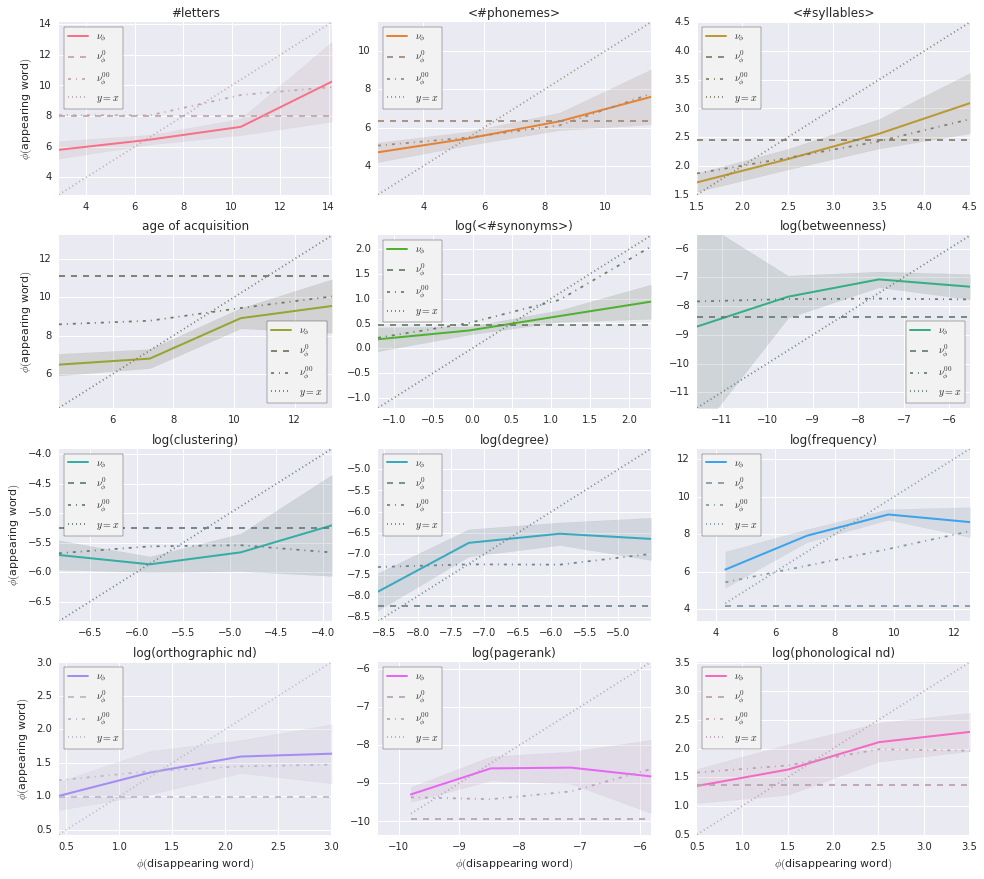

In [11]:
plot_grid(variations, ordered_features,
          'all-variations-fixedbins_global', plot_variation,
          r'$\phi($disappearing word$)$', r'$\phi($appearing word$)$')

Then plot $\nu_{\phi} - \nu_{\phi}^{00}$ for each feature (i.e. the measured bias) to see how they compare

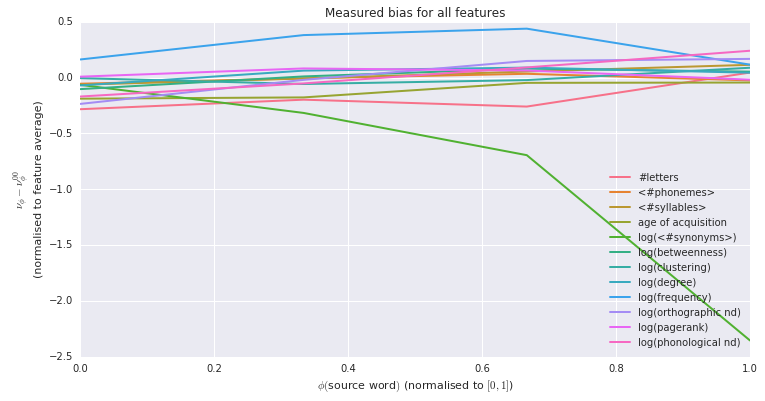

In [12]:
plot_overlay(variations, ordered_features,
             'all-variations_bias-fixedbins_global',
             'husl', plot_bias, 'Measured bias for all features',
             r'$\phi($source word$)$ (normalised to $[0, 1]$)',
             r'$\nu_{\phi} - \nu_{\phi}^{00}$'
                 '\n(normalised to feature average)',
             plot_kws={'ci': False});


---------
frequency
---------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | ns. | *** | *** | ns. |

---
aoa
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *   |
H_00 | *** | *** | *   | ns. |

----------
clustering
----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------


H_0  | *** | *** | *   | ns. |
H_00 | ns. | *** | ns. | ns. |

-------------
letters_count
-------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *   | ns. |
H_00 | *** | *** | *** | ns. |

--------------
synonyms_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------


H_0  | *   | **  | **  | *   |
H_00 | ns. | *** | *** | *** |

--------------------
orthographic_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | *   | *** | **  |
H_00 | *   | ns. | ns. | ns. |


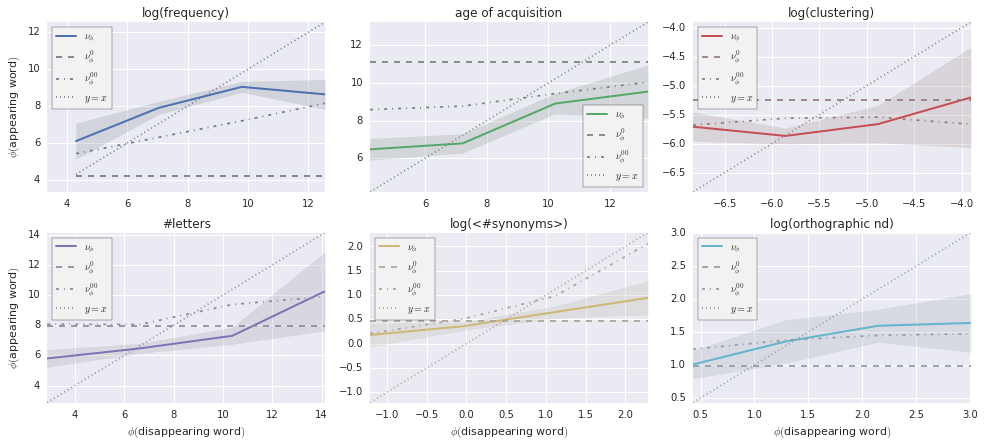

In [13]:
plot_grid(variations, PAPER_FEATURES,
          'paper-variations-fixedbins_global', plot_variation,
          r'$\phi($disappearing word$)$', r'$\phi($appearing word$)$')

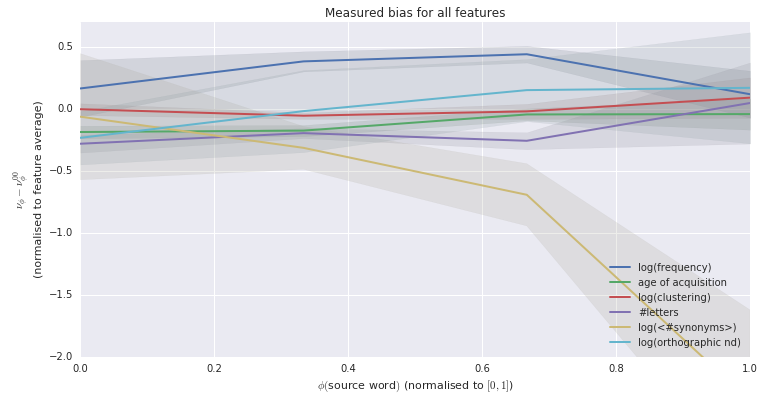

In [14]:
plot_overlay(variations, PAPER_FEATURES,
             'paper-variations_bias-fixedbins_global',
             'deep', plot_bias, 'Measured bias for all features',
             r'$\phi($source word$)$ (normalised to $[0, 1]$)',
             r'$\nu_{\phi} - \nu_{\phi}^{00}$'
                 '\n(normalised to feature average)')\
    .set_ylim(-2, .7);

#### 2.1.2 Quantiles of distribution of appeared global feature values


-------------
letters_count
-------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | ns. |
H_00 | *** | *** | *** | *** |

--------------
phonemes_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | ns. | *   |
H_00 | *   | *   | ns. | ns. |



---------------
syllables_count
---------------
Bin  |   1 |   2 |
------------------
H_0  | *** | *   |
H_00 | ns. | ns. |

---
aoa
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *** | *** | **  | ns. |

--------------
synonyms_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------


H_0  | **  | ns. | ns. | *** |
H_00 | ns. | *** | *** | *** |

-----------
betweenness
-----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | **  | *** | *** | *** |
H_00 | ns. | *** | **  | ns. |

----------
clustering
----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | **  |
H_00 | ns. | *** | *   | ns. |



------
degree
------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | **  | *** | *** | *** |
H_00 | ns. | **  | *** | **  |

---------
frequency
---------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | *** |

--------------------
orthographic_density
--------------------
Bin  |   1 |   2 |   3 |
------------------------


H_0  | ns. | **  | *** |
H_00 | *   | ns. | *   |

--------
pagerank
--------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | **  | *** | *** | *** |
H_00 | ns. | ns. | *** | *   |

--------------------
phonological_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | ns. | *** | *** |
H_00 | ns. | ns. | ns. | ns. |


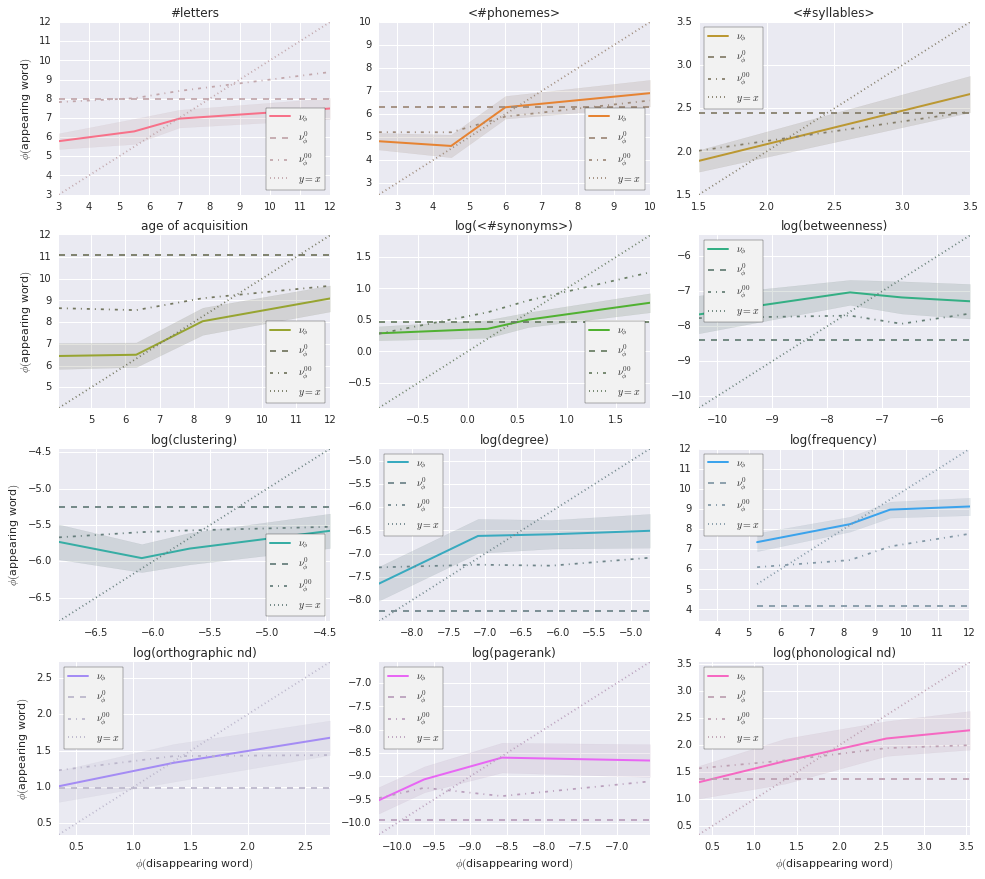

In [15]:
plot_grid(variations, ordered_features,
          'all-variations-quantilebins_global', plot_variation,
          r'$\phi($disappearing word$)$', r'$\phi($appearing word$)$',
          plot_kws={'quantiles': True})

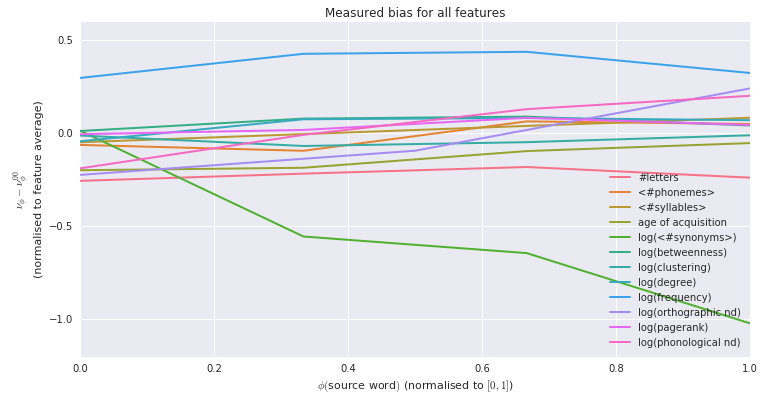

In [16]:
plot_overlay(variations, ordered_features,
             'all-variations_bias-quantilebins_global',
             'husl', plot_bias, 'Measured bias for all features',
             r'$\phi($source word$)$ (normalised to $[0, 1]$)',
             r'$\nu_{\phi} - \nu_{\phi}^{00}$'
                 '\n(normalised to feature average)',
             plot_kws={'ci': False, 'quantiles': True});


---------
frequency
---------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | *** |

---
aoa
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *** | *** | **  | ns. |

----------
clustering
----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | **  |


H_00 | ns. | *** | *   | ns. |

-------------
letters_count
-------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | ns. |
H_00 | *** | *** | *** | *** |

--------------
synonyms_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | **  | ns. | ns. | *** |
H_00 | ns. | *** | *** | *** |



--------------------
orthographic_density
--------------------
Bin  |   1 |   2 |   3 |
------------------------
H_0  | ns. | **  | *** |
H_00 | *   | ns. | *   |


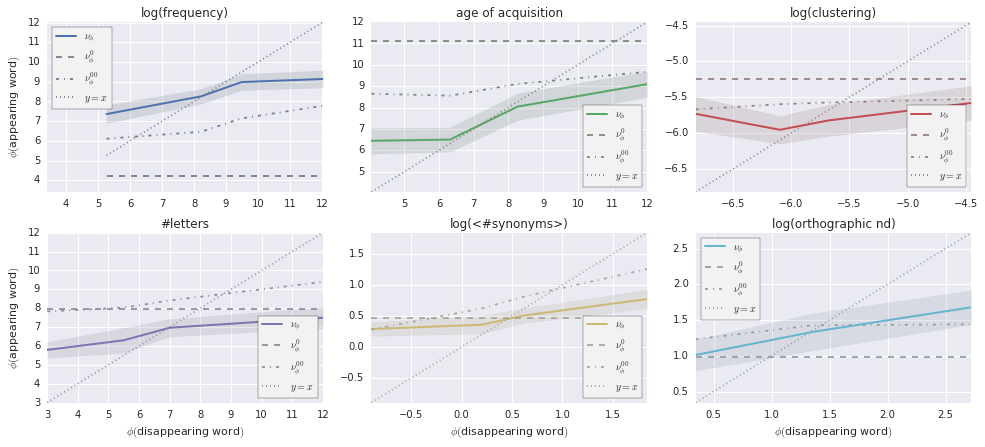

In [17]:
plot_grid(variations, PAPER_FEATURES,
          'paper-variations-quantilebins_global', plot_variation,
          r'$\phi($disappearing word$)$', r'$\phi($appearing word$)$',
          plot_kws={'quantiles': True})

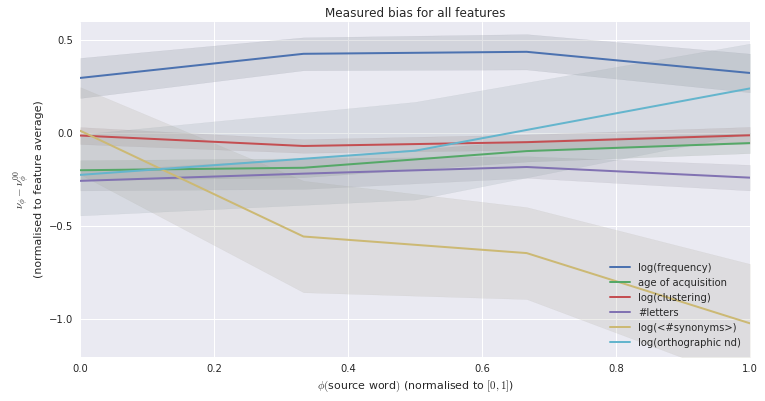

In [18]:
plot_overlay(variations, PAPER_FEATURES,
             'paper-variations_bias-quantilebins_global',
             'deep', plot_bias, 'Measured bias for all features',
             r'$\phi($source word$)$ (normalised to $[0, 1]$)',
             r'$\nu_{\phi} - \nu_{\phi}^{00}$'
                 '\n(normalised to feature average)',
             plot_kws={'quantiles': True})\
    .set_ylim(-1.2, .6);

### 2.2 Sentence-relative feature values

#### 2.2.1 Bins of distribution of appeared sentence-relative values


-------------
letters_count
-------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | **  | *** | *** | ns. |
H_00 | *** | *** | *** | ns. |

--------------
phonemes_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | ns. | ns. |
H_00 | *   | ns. | ns. | ns. |



---------------
syllables_count
---------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *   | *** | **  | **  |
H_00 | ns. | ns. | ns. | ns. |

---
aoa
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *   | ns. |



--------------
synonyms_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | ns. | **  | ns. |
H_00 | ns. | **  | *** | *** |

-----------
betweenness
-----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | *   | *** | *   |
H_00 | ns. | ns. | *** | ns. |

----------
clustering
----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------


H_0  | ns. | *** | *** | ns. |
H_00 | ns. | *   | **  | ns. |

------
degree
------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | *** | *** | *** |
H_00 | **  | ns. | *** | **  |

---------
frequency
---------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |


H_00 | **  | *** | *** | *** |

--------------------
orthographic_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | ns. | *** | *   |
H_00 | **  | ns. | ns. | ns. |

--------
pagerank
--------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | *** | *** | **  |
H_00 | ns. | *   | *** | ns. |



--------------------
phonological_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | ns. | *** | *** |
H_00 | ns. | ns. | ns. | ns. |


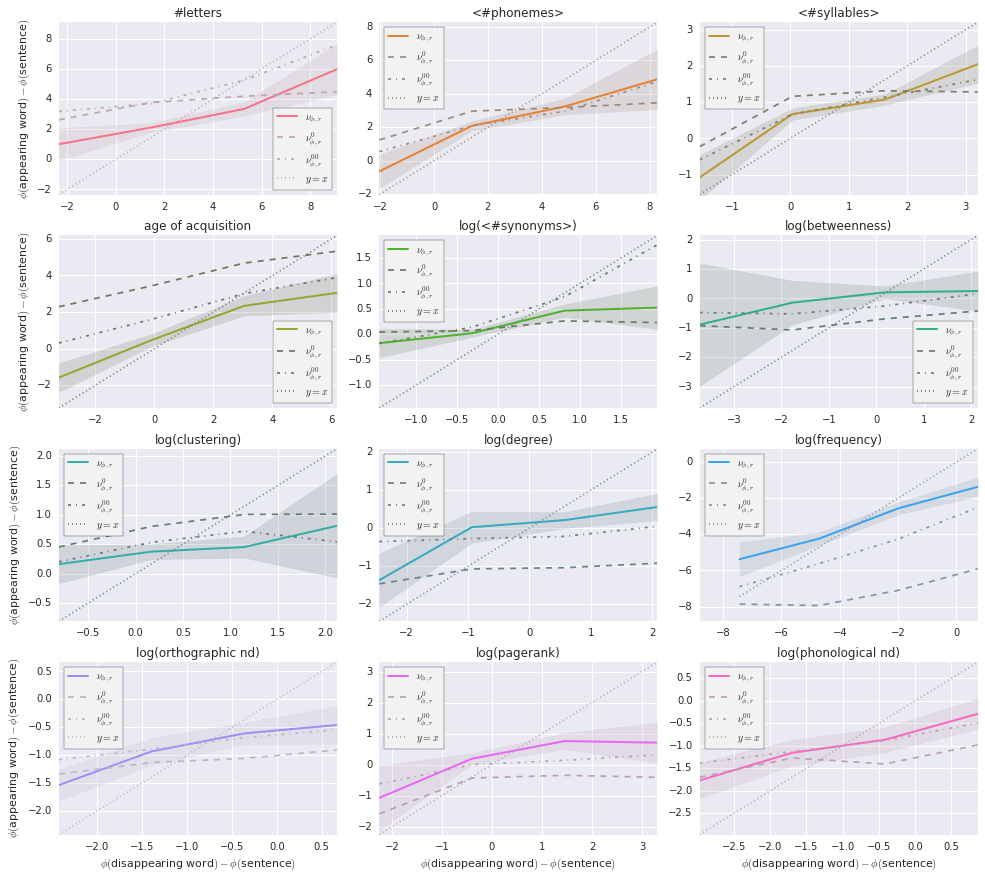

In [19]:
plot_grid(variations, ordered_features,
          'all-variations-fixedbins_sentencerel', plot_variation,
          r'$\phi($disappearing word$) - \phi($sentence$)$',
          r'$\phi($appearing word$) - \phi($sentence$)$',
          plot_kws={'relative': True})

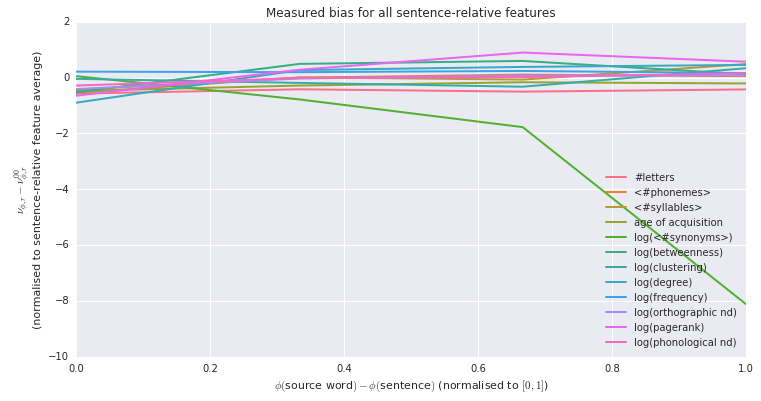

In [20]:
plot_overlay(variations, ordered_features,
             'all-variations_bias-fixedbins_sentencerel',
             'husl', plot_bias,
             'Measured bias for all sentence-relative features',
             r'$\phi($source word$) - \phi($sentence$)$'
                 r' (normalised to $[0, 1]$)',
             r'$\nu_{\phi,r} - \nu_{\phi,r}^{00}$'
                 '\n(normalised to sentence-relative feature average)',
             plot_kws={'ci': False, 'relative': True});


---------
frequency
---------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | **  | *** | *** | *** |

---
aoa
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *   | ns. |

----------
clustering
----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------


H_0  | ns. | *** | *** | ns. |
H_00 | ns. | *   | **  | ns. |

-------------
letters_count
-------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | **  | *** | *** | ns. |
H_00 | *** | *** | *** | ns. |

--------------
synonyms_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | ns. | **  | ns. |


H_00 | ns. | **  | *** | *** |

--------------------
orthographic_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | ns. | *** | *   |
H_00 | **  | ns. | ns. | ns. |


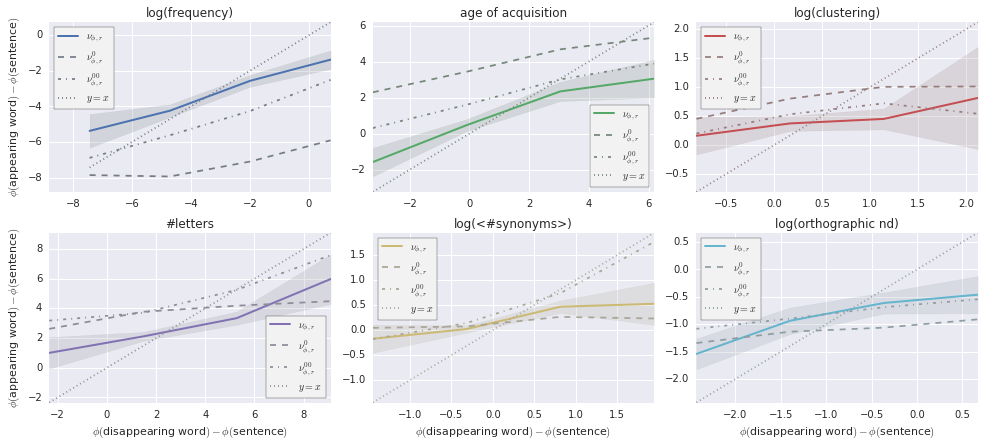

In [21]:
plot_grid(variations, PAPER_FEATURES,
          'paper-variations-fixedbins_sentencerel', plot_variation,
          r'$\phi($disappearing word$) - \phi($sentence$)$',
          r'$\phi($appearing word$) - \phi($sentence$)$',
          plot_kws={'relative': True})

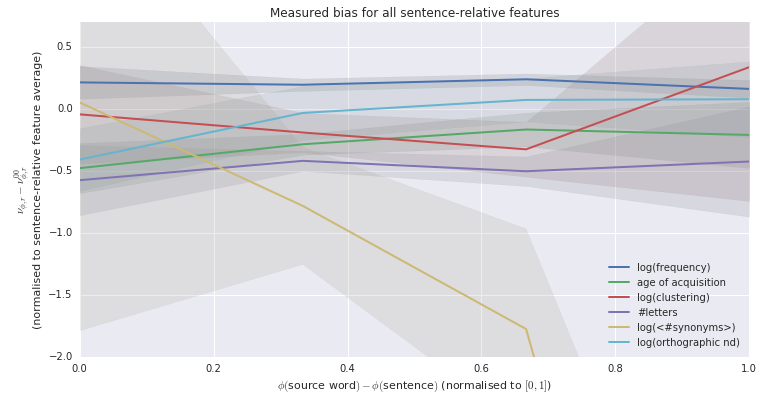

In [22]:
plot_overlay(variations, PAPER_FEATURES,
             'paper-variations_bias-fixedbins_sentencerel',
             'deep', plot_bias,
             'Measured bias for all sentence-relative features',
             r'$\phi($source word$) - \phi($sentence$)$'
                 r' (normalised to $[0, 1]$)',
             r'$\nu_{\phi,r} - \nu_{\phi,r}^{00}$'
                 '\n(normalised to sentence-relative feature average)',
             plot_kws={'relative': True})\
    .set_ylim(-2, .7);

#### 2.2.2 Quantiles of distribution of appeared sentence-relative values


-------------
letters_count
-------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | ns. |
H_00 | *** | *** | *** | *** |

--------------
phonemes_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | ns. | ns. |
H_00 | ns. | ns. | ns. | ns. |



---------------
syllables_count
---------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | **  | ns. | ns. |
H_00 | ns. | ns. | ns. | ns. |

---
aoa
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | ns. |

--------------
synonyms_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------


H_0  | *** | ns. | ns. | **  |
H_00 | ns. | ns. | *** | *** |

-----------
betweenness
-----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | **  | *** | *** | ns. |
H_00 | ns. | *   | *** | ns. |

----------
clustering
----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | **  | *** |


H_00 | ns. | **  | ns. | *   |

------
degree
------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | ns. | ns. | **  | *** |

---------
frequency
---------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | *** |



--------------------
orthographic_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | ns. | *** | **  |
H_00 | *   | ns. | ns. | ns. |

--------
pagerank
--------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | **  | *** | *** | *** |
H_00 | ns. | ns. | *** | **  |

--------------------
phonological_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | ns. | **  | *** |


H_00 | *   | ns. | ns. | ns. |


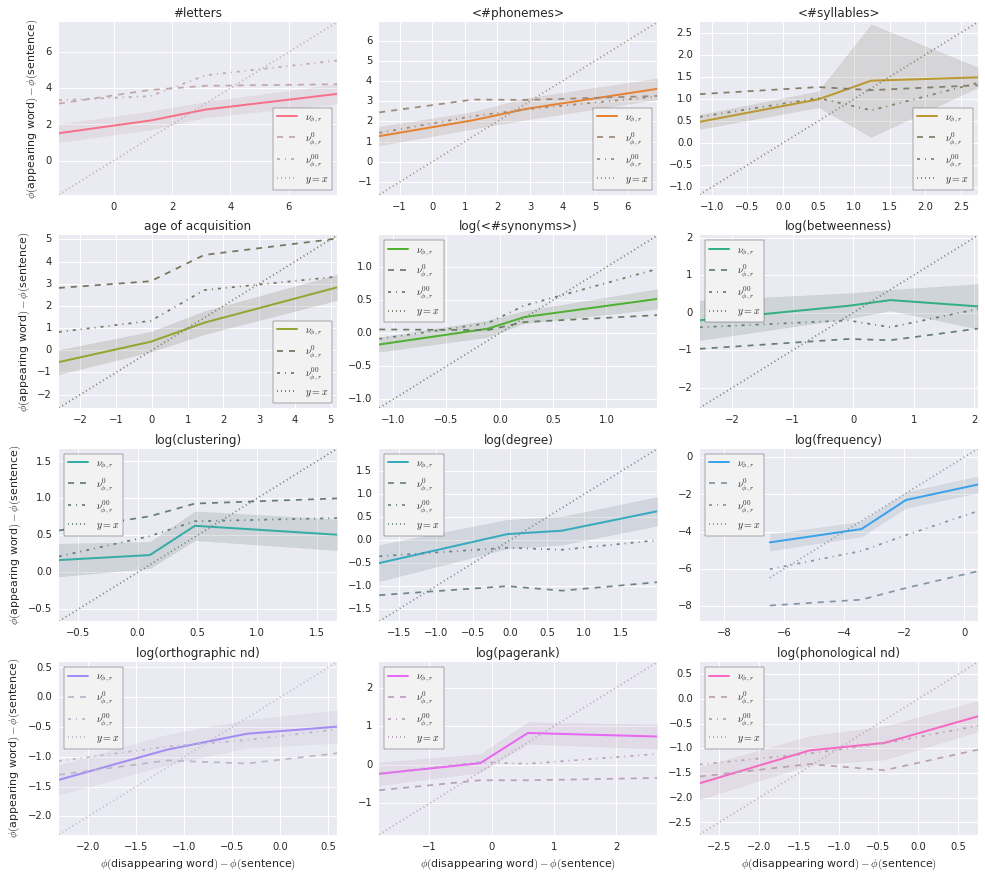

In [23]:
plot_grid(variations, ordered_features,
          'all-variations-quantilebins_sentencerel', plot_variation,
          r'$\phi($disappearing word$) - \phi($sentence$)$',
          r'$\phi($appearing word$) - \phi($sentence$)$',
          plot_kws={'relative': True, 'quantiles': True})

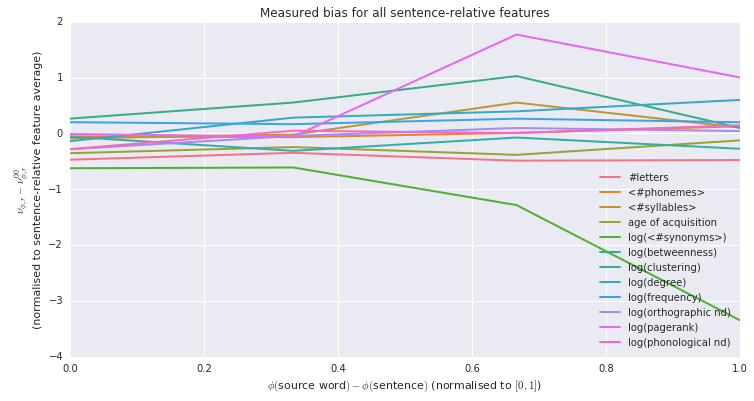

In [24]:
plot_overlay(variations, ordered_features,
             'all-variations_bias-quantilebins_sentencerel',
             'husl', plot_bias,
             'Measured bias for all sentence-relative features',
             r'$\phi($source word$) - \phi($sentence$)$'
                 r' (normalised to $[0, 1]$)',
             r'$\nu_{\phi,r} - \nu_{\phi,r}^{00}$'
                 '\n(normalised to sentence-relative feature average)',
             plot_kws={'ci': False, 'relative': True, 'quantiles': True});


---------
frequency
---------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | *** |

---
aoa
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | ns. |

----------
clustering
----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------


H_0  | *** | *** | **  | *** |
H_00 | ns. | **  | ns. | *   |

-------------
letters_count
-------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | ns. |
H_00 | *** | *** | *** | *** |

--------------
synonyms_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | ns. | ns. | **  |


H_00 | ns. | ns. | *** | *** |

--------------------
orthographic_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | ns. | *** | **  |
H_00 | *   | ns. | ns. | ns. |


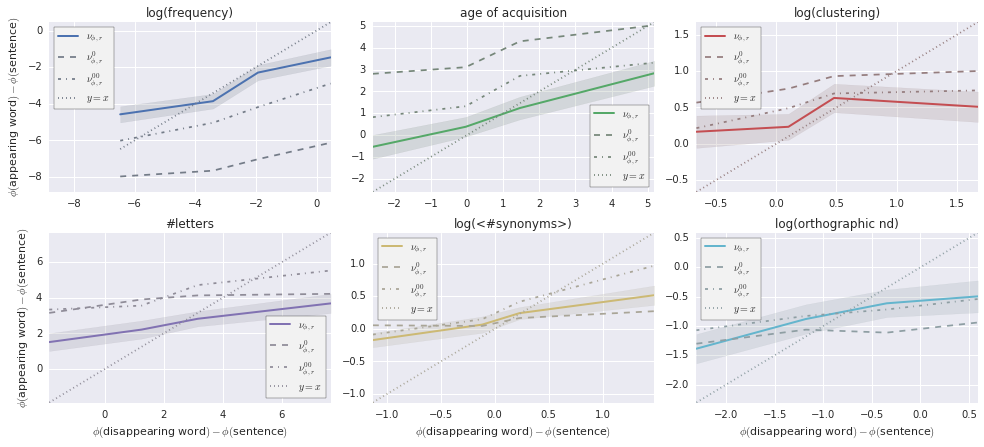

In [25]:
plot_grid(variations, PAPER_FEATURES,
          'paper-variations-quantilebins_sentencerel', plot_variation,
          r'$\phi($disappearing word$) - \phi($sentence$)$',
          r'$\phi($appearing word$) - \phi($sentence$)$',
          plot_kws={'relative': True, 'quantiles': True})

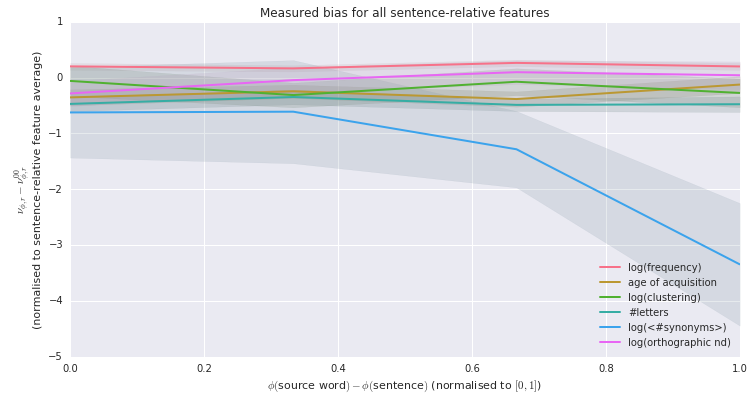

In [26]:
plot_overlay(variations, PAPER_FEATURES,
             'paper-variations_bias-quantilebins_sentencerel',
             'husl', plot_bias,
             'Measured bias for all sentence-relative features',
             r'$\phi($source word$) - \phi($sentence$)$'
                 r' (normalised to $[0, 1]$)',
             r'$\nu_{\phi,r} - \nu_{\phi,r}^{00}$'
                 '\n(normalised to sentence-relative feature average)',
             plot_kws={'relative': True, 'quantiles': True});

## 3 Streamplots

We'd like to see what happens between absolute and relative feature values, i.e. how do their effects interact. Especially, we want to know who wins between cognitive bias, attraction to sentence average, or attraction to global feature average.

To do this we plot the general direction (arrows) and strength (color) of where destination words are given a particular absolute/relative source feature couple. I.e., for a given absolute feature value and relative feature value, if this word were to be substituted, where would it go in this (absolute, relative) space?

The interesting thing in these plots is the attraction front, where all arrows point to and join. We're interested in:
* its slope
* its shape (e.g. several slope regimes?)
* its position w.r.t. $\nu_{\phi}^0$ and $y = 0$ (which is $\left< \phi(sentence) \right>$)

First, here's our plotting function. (Note we set the arrow size to something that turns out to be huge here, but gives normal sizes in the figures saves. There must be some dpi scaling problem with the arrows.)

In [27]:
def plot_stream(**kwargs):
    data = kwargs.pop('data')
    color = kwargs.get('color', 'blue')
    source = data['source']
    source_rel = data['source_rel']
    dest = data['destination']
    dest_rel = data['destination_rel']
    h0 = data['h0']
    
    # Compute binning.
    bin_count = 4
    x_bins, x_margins = pd.cut(source, bin_count,
                               right=False, labels=False, retbins=True)
    x_middles = (x_margins[:-1] + x_margins[1:]) / 2
    y_bins, y_margins = pd.cut(source_rel, bin_count,
                               right=False, labels=False, retbins=True)
    y_middles = (y_margins[:-1] + y_margins[1:]) / 2
    
    # Compute bin values.
    h0s = np.ones(bin_count) * h0.iloc[0]
    u_values = np.zeros((bin_count, bin_count))
    v_values = np.zeros((bin_count, bin_count))
    strength = np.zeros((bin_count, bin_count))
    for x in range(bin_count):
        for y in range(bin_count):
            u_values[y, x] = (
                dest[(x_bins == x) & (y_bins == y)] -
                source[(x_bins == x) & (y_bins == y)]
            ).mean()
            v_values[y, x] = (
                dest_rel[(x_bins == x) & (y_bins == y)] -
                source_rel[(x_bins == x) & (y_bins == y)]
            ).mean()
            strength[y, x] = np.sqrt(
                (dest[(x_bins == x) & (y_bins == y)] - 
                 source[(x_bins == x) & (y_bins == y)]) ** 2 +
                (dest_rel[(x_bins == x) & (y_bins == y)] - 
                 source_rel[(x_bins == x) & (y_bins == y)]) ** 2
            ).mean()
    
    # Plot.
    plt.streamplot(x_middles, y_middles, u_values, v_values,
                   arrowsize=4, color=strength, cmap=plt.cm.viridis)
    plt.plot(x_middles, np.zeros(bin_count), linestyle='-',
             color=sb.desaturate(color, 0.2), 
             label=r'$\left< \phi(sentence) \right>$')
    plt.plot(h0s, y_middles, linestyle='--',
             color=sb.desaturate(color, 0.2), label=r'$\nu_{\phi}^0$')
    plt.xlim(x_middles[0], x_middles[-1])
    plt.ylim(y_middles[0], y_middles[-1])

Here are the plots for all features

/home/sl/.virtualenvs/brainscopypaste/lib/python3.5/site-packages/numpy/ma/core.py:4144: UserWarning: Warning: converting a masked element to nan.
  warnings.warn("Warning: converting a masked element to nan.")


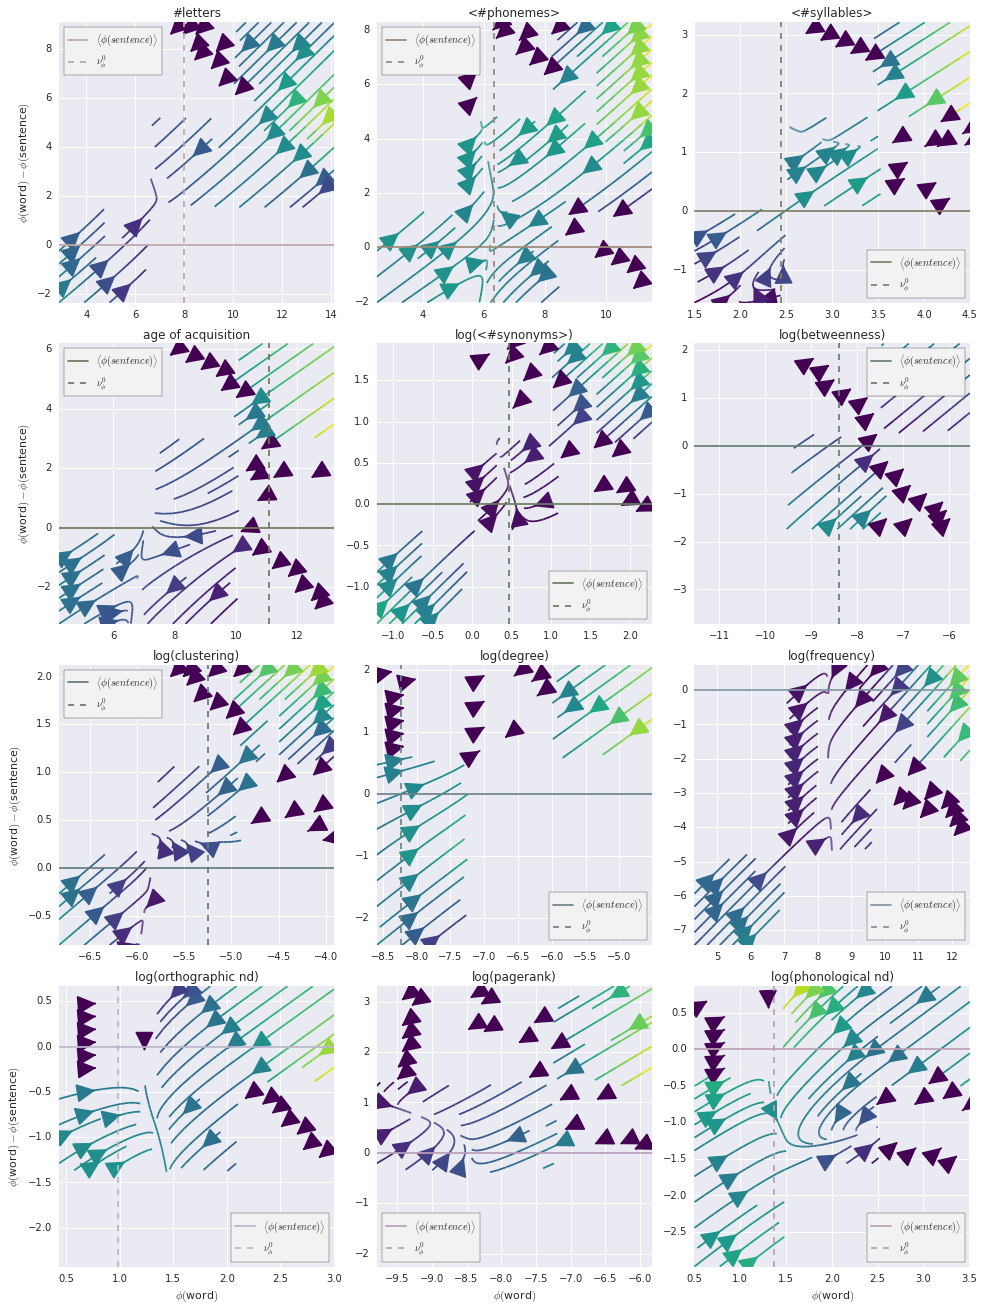

In [28]:
g = sb.FacetGrid(data=variations,
                 col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1, size=4.5,
                 col_order=ordered_features, hue_order=ordered_features)
g.map_dataframe(plot_stream)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($word$)$')
g.set_ylabels(r'$\phi($word$) - \phi($sentence$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='best')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-feature_streams'),
                  bbox_inches='tight', dpi=300)

And here are the plots for the features we expose in the paper

/home/sl/.virtualenvs/brainscopypaste/lib/python3.5/site-packages/numpy/ma/core.py:4144: UserWarning: Warning: converting a masked element to nan.
  warnings.warn("Warning: converting a masked element to nan.")


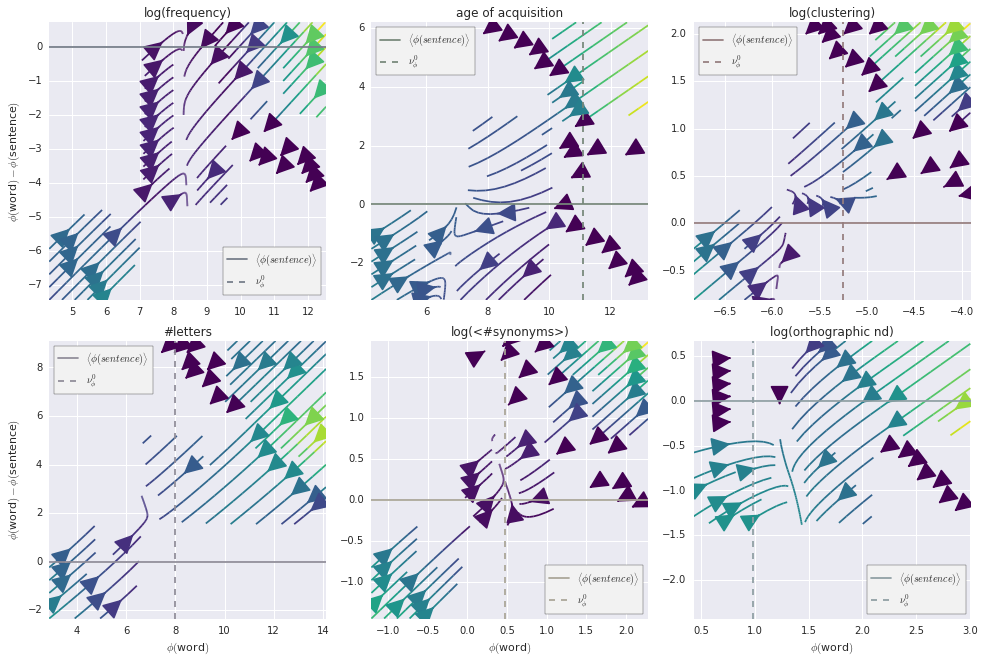

In [29]:
g = sb.FacetGrid(data=variations[variations['feature']
                                 .map(lambda f: f in PAPER_FEATURES)],
                 col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1, size=4.5,
                 col_order=PAPER_FEATURES, hue_order=PAPER_FEATURES)
g.map_dataframe(plot_stream)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($word$)$')
g.set_ylabels(r'$\phi($word$) - \phi($sentence$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='best')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-feature_streams'),
                  bbox_inches='tight', dpi=300)

## 4 PCA'd feature variations

Compute PCA on feature *variations* (note: on variations, not on features directly), and show the evolution of the first three components upon substitution.

**CAVEAT**: the PCA is computed on variations where all features are defined. This greatly reduces the number of words included (and also the number of substitutions -- see below for real values, but you should know it's drastic). This also has an effect on the computation of $\mathcal{H}_0$ and $\mathcal{H}_{00}$, which are computed using words for which all features are defined. This, again, hugely reduces the number of words taken into account, changing the values under the null hypotheses.

### 4.1 On all the features

Compute the actual PCA

In [30]:
# Compute the PCA.
pcafeatures = tuple(sorted(Substitution.__features__))
pcavariations = variations.pivot(index='cluster_id',
                                 columns='feature', values='variation')
pcavariations = pcavariations.dropna()
pca = PCA(n_components='mle')
pca.fit(pcavariations)

# Show 
print('MLE estimates there are {} components.\n'.format(pca.n_components_))
print('Those explain the following variance:')
print(pca.explained_variance_ratio_)
print()

print("We're plotting variation for the first {} components:"
      .format(N_COMPONENTS))
pd.DataFrame(pca.components_[:N_COMPONENTS],
             columns=pcafeatures,
             index=['Component-{}'.format(i) for i in range(N_COMPONENTS)])

MLE estimates there are 10 components.

Those explain the following variance:
[ 0.55032841  0.15333033  0.08368943  0.07604974  0.03688808  0.02731091
  0.0207735   0.01834456  0.01215353  0.01056822]

We're plotting variation for the first 3 components:


,aoa,betweenness,clustering,degree,frequency,letters_count,orthographic_density,pagerank,phonemes_count,phonological_density,syllables_count,synonyms_count
Component-0,-0.468881,0.324011,-0.100663,0.251706,0.275475,-0.423402,0.213411,0.275275,-0.366154,0.263802,-0.146755,-0.002217
Component-1,0.272132,-0.323434,0.098092,-0.267714,-0.302221,-0.428990,0.121751,-0.316236,-0.530175,0.214495,-0.147851,0.029822
Component-2,-0.672428,-0.106674,-0.005963,0.001734,-0.718328,0.082599,0.028255,-0.050776,0.083237,-0.031154,0.014735,0.045954


Compute the source and destination component values, along with $\mathcal{H}_0$ and $\mathcal{H}_{00}$, for each component.

In [31]:
data = []
for substitution_id in ProgressBar(term_width=80)(substitution_ids):
    with session_scope() as session:
        substitution = session.query(Substitution).get(substitution_id)
        
        for component in range(N_COMPONENTS):
            source, destination = substitution\
                .components(component, pca, pcafeatures)
            data.append({
                'cluster_id': substitution.source.cluster.sid,
                'destination_id': substitution.destination.sid,
                'occurrence': substitution.occurrence,
                'position': substitution.position,
                'source_id': substitution.source.sid,
                'component': component,
                'source': source,
                'destination': destination,
                'h0': substitution.component_average(component, pca,
                                                     pcafeatures),
                'h0n': substitution.component_average(component, pca,
                                                      pcafeatures,
                                                      source_synonyms=True)
            })

original_component_variations = pd.DataFrame(data)
del data

  0% (   0 of 3036) |                     | Elapsed Time: 0:00:00 ETA:  --:--:--

  0% (   5 of 3036) |                       | Elapsed Time: 0:00:43 ETA: 7:21:38

  0% (  27 of 3036) |                       | Elapsed Time: 0:00:43 ETA: 1:21:35

  1% (  52 of 3036) |                       | Elapsed Time: 0:00:44 ETA: 0:42:12

  2% (  76 of 3036) |                       | Elapsed Time: 0:00:44 ETA: 0:28:46

  3% ( 101 of 3036) |                       | Elapsed Time: 0:00:44 ETA: 0:21:34

  4% ( 123 of 3036) |                       | Elapsed Time: 0:00:44 ETA: 0:00:26

  4% ( 141 of 3036) |#                      | Elapsed Time: 0:00:44 ETA: 0:00:27

  5% ( 166 of 3036) |#                      | Elapsed Time: 0:00:45 ETA: 0:00:27

  6% ( 190 of 3036) |#                      | Elapsed Time: 0:00:45 ETA: 0:00:27

  6% ( 208 of 3036) |#                      | Elapsed Time: 0:00:45 ETA: 0:00:29

  7% ( 228 of 3036) |#                      | Elapsed Time: 0:00:45 ETA: 0:00:29

  8% ( 246 of 3036) |#                      | Elapsed Time: 0:00:46 ETA: 0:00:29

  8% ( 266 of 3036) |##                     | Elapsed Time: 0:00:46 ETA: 0:00:31

  9% ( 284 of 3036) |##                     | Elapsed Time: 0:00:46 ETA: 0:00:31

 10% ( 304 of 3036) |##                     | Elapsed Time: 0:00:46 ETA: 0:00:30

 10% ( 322 of 3036) |##                     | Elapsed Time: 0:00:46 ETA: 0:00:30

 11% ( 342 of 3036) |##                     | Elapsed Time: 0:00:47 ETA: 0:00:30

 11% ( 360 of 3036) |##                     | Elapsed Time: 0:00:47 ETA: 0:00:30

 12% ( 380 of 3036) |##                     | Elapsed Time: 0:00:47 ETA: 0:00:30

 13% ( 398 of 3036) |###                    | Elapsed Time: 0:00:47 ETA: 0:00:30

 13% ( 418 of 3036) |###                    | Elapsed Time: 0:00:48 ETA: 0:00:29

 14% ( 436 of 3036) |###                    | Elapsed Time: 0:00:48 ETA: 0:00:29

 15% ( 456 of 3036) |###                    | Elapsed Time: 0:00:48 ETA: 0:00:29

 15% ( 474 of 3036) |###                    | Elapsed Time: 0:00:48 ETA: 0:00:29

 16% ( 494 of 3036) |###                    | Elapsed Time: 0:00:48 ETA: 0:00:28

 16% ( 514 of 3036) |###                    | Elapsed Time: 0:00:49 ETA: 0:00:27

 17% ( 542 of 3036) |####                   | Elapsed Time: 0:00:49 ETA: 0:00:26

 18% ( 570 of 3036) |####                   | Elapsed Time: 0:00:49 ETA: 0:00:25

 19% ( 596 of 3036) |####                   | Elapsed Time: 0:00:49 ETA: 0:00:23

 20% ( 618 of 3036) |####                   | Elapsed Time: 0:00:50 ETA: 0:00:23

 21% ( 646 of 3036) |####                   | Elapsed Time: 0:00:50 ETA: 0:00:23

 21% ( 666 of 3036) |#####                  | Elapsed Time: 0:00:50 ETA: 0:00:23

 22% ( 694 of 3036) |#####                  | Elapsed Time: 0:00:50 ETA: 0:00:25

 23% ( 722 of 3036) |#####                  | Elapsed Time: 0:00:51 ETA: 0:00:25

 24% ( 744 of 3036) |#####                  | Elapsed Time: 0:00:51 ETA: 0:00:24

 25% ( 770 of 3036) |#####                  | Elapsed Time: 0:00:51 ETA: 0:00:23

 26% ( 797 of 3036) |######                 | Elapsed Time: 0:00:51 ETA: 0:00:22

 27% ( 821 of 3036) |######                 | Elapsed Time: 0:00:52 ETA: 0:00:21

 27% ( 849 of 3036) |######                 | Elapsed Time: 0:00:52 ETA: 0:00:19

 29% ( 883 of 3036) |######                 | Elapsed Time: 0:00:52 ETA: 0:00:19

 30% ( 911 of 3036) |######                 | Elapsed Time: 0:00:52 ETA: 0:00:17

 31% ( 949 of 3036) |#######                | Elapsed Time: 0:00:53 ETA: 0:00:16

 32% ( 974 of 3036) |#######                | Elapsed Time: 0:00:53 ETA: 0:00:16

 33% (1002 of 3036) |#######                | Elapsed Time: 0:00:53 ETA: 0:00:17

 34% (1039 of 3036) |#######                | Elapsed Time: 0:00:53 ETA: 0:00:16

 35% (1077 of 3036) |########               | Elapsed Time: 0:00:54 ETA: 0:00:15

 36% (1115 of 3036) |########               | Elapsed Time: 0:00:54 ETA: 0:00:14

 37% (1152 of 3036) |########               | Elapsed Time: 0:00:54 ETA: 0:00:13

 38% (1177 of 3036) |########               | Elapsed Time: 0:00:54 ETA: 0:00:13

 39% (1202 of 3036) |#########              | Elapsed Time: 0:00:55 ETA: 0:00:14

 40% (1225 of 3036) |#########              | Elapsed Time: 0:00:55 ETA: 0:00:14

 41% (1253 of 3036) |#########              | Elapsed Time: 0:00:55 ETA: 0:00:15

 42% (1291 of 3036) |#########              | Elapsed Time: 0:00:55 ETA: 0:00:15

 43% (1329 of 3036) |##########             | Elapsed Time: 0:00:56 ETA: 0:00:14

 44% (1353 of 3036) |##########             | Elapsed Time: 0:00:56 ETA: 0:00:14

 45% (1379 of 3036) |##########             | Elapsed Time: 0:00:56 ETA: 0:00:13

 46% (1405 of 3036) |##########             | Elapsed Time: 0:00:56 ETA: 0:00:13

 47% (1427 of 3036) |##########             | Elapsed Time: 0:00:57 ETA: 0:00:14

 47% (1453 of 3036) |###########            | Elapsed Time: 0:00:57 ETA: 0:00:14

 48% (1481 of 3036) |###########            | Elapsed Time: 0:00:57 ETA: 0:00:14

 50% (1519 of 3036) |###########            | Elapsed Time: 0:00:57 ETA: 0:00:13

 51% (1556 of 3036) |###########            | Elapsed Time: 0:00:58 ETA: 0:00:12

 52% (1579 of 3036) |###########            | Elapsed Time: 0:00:58 ETA: 0:00:11

 52% (1604 of 3036) |############           | Elapsed Time: 0:00:58 ETA: 0:00:11

 53% (1632 of 3036) |############           | Elapsed Time: 0:00:58 ETA: 0:00:11

 54% (1657 of 3036) |############           | Elapsed Time: 0:00:59 ETA: 0:00:11

 55% (1678 of 3036) |############           | Elapsed Time: 0:00:59 ETA: 0:00:12

 56% (1708 of 3036) |############           | Elapsed Time: 0:00:59 ETA: 0:00:11

 57% (1746 of 3036) |#############          | Elapsed Time: 0:00:59 ETA: 0:00:10

 58% (1762 of 3036) |#############          | Elapsed Time: 0:00:59 ETA: 0:00:11

 59% (1801 of 3036) |#############          | Elapsed Time: 0:01:00 ETA: 0:00:10

 60% (1838 of 3036) |#############          | Elapsed Time: 0:01:00 ETA: 0:00:09

 61% (1860 of 3036) |##############         | Elapsed Time: 0:01:00 ETA: 0:00:09

 62% (1898 of 3036) |##############         | Elapsed Time: 0:01:01 ETA: 0:00:09

 63% (1917 of 3036) |##############         | Elapsed Time: 0:01:01 ETA: 0:00:08

 63% (1927 of 3036) |##############         | Elapsed Time: 0:01:01 ETA: 0:00:10

 64% (1950 of 3036) |##############         | Elapsed Time: 0:01:01 ETA: 0:00:10

 65% (1985 of 3036) |###############        | Elapsed Time: 0:01:01 ETA: 0:00:09

 66% (2012 of 3036) |###############        | Elapsed Time: 0:01:02 ETA: 0:00:11

 67% (2050 of 3036) |###############        | Elapsed Time: 0:01:02 ETA: 0:00:09

 68% (2088 of 3036) |###############        | Elapsed Time: 0:01:02 ETA: 0:00:07

 69% (2115 of 3036) |################       | Elapsed Time: 0:01:02 ETA: 0:00:07

 70% (2138 of 3036) |################       | Elapsed Time: 0:01:03 ETA: 0:00:07

 71% (2164 of 3036) |################       | Elapsed Time: 0:01:03 ETA: 0:00:06

 72% (2202 of 3036) |################       | Elapsed Time: 0:01:03 ETA: 0:00:06

 73% (2240 of 3036) |################       | Elapsed Time: 0:01:03 ETA: 0:00:06

 75% (2278 of 3036) |#################      | Elapsed Time: 0:01:04 ETA: 0:00:05

 75% (2302 of 3036) |#################      | Elapsed Time: 0:01:04 ETA: 0:00:05

 76% (2328 of 3036) |#################      | Elapsed Time: 0:01:04 ETA: 0:00:05

 77% (2361 of 3036) |#################      | Elapsed Time: 0:01:04 ETA: 0:00:05

 78% (2380 of 3036) |##################     | Elapsed Time: 0:01:05 ETA: 0:00:05

 79% (2409 of 3036) |##################     | Elapsed Time: 0:01:05 ETA: 0:00:05

 80% (2441 of 3036) |##################     | Elapsed Time: 0:01:05 ETA: 0:00:05

 81% (2467 of 3036) |##################     | Elapsed Time: 0:01:05 ETA: 0:00:05

 82% (2505 of 3036) |##################     | Elapsed Time: 0:01:06 ETA: 0:00:04

 83% (2528 of 3036) |###################    | Elapsed Time: 0:01:06 ETA: 0:00:04

 84% (2552 of 3036) |###################    | Elapsed Time: 0:01:06 ETA: 0:00:03

 85% (2581 of 3036) |###################    | Elapsed Time: 0:01:06 ETA: 0:00:03

 86% (2619 of 3036) |###################    | Elapsed Time: 0:01:07 ETA: 0:00:03

 87% (2642 of 3036) |####################   | Elapsed Time: 0:01:07 ETA: 0:00:03

 87% (2670 of 3036) |####################   | Elapsed Time: 0:01:07 ETA: 0:00:02

 88% (2695 of 3036) |####################   | Elapsed Time: 0:01:07 ETA: 0:00:02

 90% (2733 of 3036) |####################   | Elapsed Time: 0:01:08 ETA: 0:00:02

 91% (2771 of 3036) |####################   | Elapsed Time: 0:01:08 ETA: 0:00:02

 92% (2809 of 3036) |#####################  | Elapsed Time: 0:01:08 ETA: 0:00:01

 93% (2847 of 3036) |#####################  | Elapsed Time: 0:01:08 ETA: 0:00:01

 95% (2885 of 3036) |#####################  | Elapsed Time: 0:01:09 ETA: 0:00:01

 96% (2923 of 3036) |###################### | Elapsed Time: 0:01:09 ETA: 0:00:00

 97% (2961 of 3036) |###################### | Elapsed Time: 0:01:09 ETA: 0:00:00

 98% (2984 of 3036) |###################### | Elapsed Time: 0:01:09 ETA: 0:00:00

 99% (3008 of 3036) |###################### | Elapsed Time: 0:01:10 ETA: 0:00:00

100% (3036 of 3036) |######################| Elapsed Time: 0:01:10 Time: 0:01:10


Compute cluster averages (so as not to overestimate confidence intervals).

In [32]:
component_variations = original_component_variations\
    .groupby(['destination_id', 'occurrence', 'position', 'component'],
             as_index=False).mean()\
    .groupby(['cluster_id', 'component'], as_index=False)\
    ['source', 'destination', 'component', 'h0', 'h0n'].mean()

Plot the actual variations of components (**see the caveat section below**)


---
0.0
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | ns. | *** | *** |
H_00 | ns. | ns. | **  | ns. |

---
1.0
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *   | *** | *** | *** |
H_00 | ns. | *** | *** | **  |

---
2.0
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *   | ns. |
H_00 | ns. | *   | ns. | ns. |


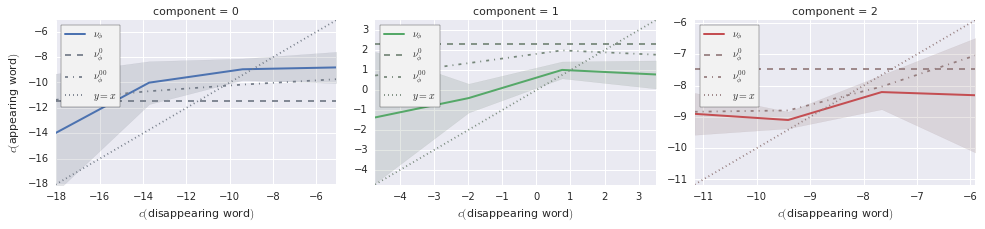

In [33]:
g = sb.FacetGrid(data=component_variations, col='component', col_wrap=3,
                 sharex=False, sharey=False, hue='component',
                 aspect=1.5, size=3)
g.map_dataframe(plot_variation, feature_field='component')
g.set_xlabels(r'$c($disappearing word$)$')
g.set_ylabels(r'$c($appearing word$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='upper left')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-pca_variations-absolute'),
                  bbox_inches='tight', dpi=300)

### 4.2 On a subset of relevant features

In [34]:
relevant_features = ['frequency', 'aoa', 'letters_count']

Compute the actual PCA

In [35]:
# Compute the PCA.
pcafeatures = tuple(sorted(relevant_features))
pcavariations = variations[variations['feature']
                           .map(lambda f: f in pcafeatures)]\
    .pivot(index='cluster_id', columns='feature', values='variation')
pcavariations = pcavariations.dropna()
pca = PCA(n_components='mle')
pca.fit(pcavariations)

# Show 
print('MLE estimates there are {} components.\n'.format(pca.n_components_))
print('Those explain the following variance:')
print(pca.explained_variance_ratio_)
print()

pd.DataFrame(pca.components_,
             columns=pcafeatures,
             index=['Component-{}'.format(i)
                    for i in range(pca.n_components_)])

MLE estimates there are 1 components.

Those explain the following variance:
[ 0.623601]



,aoa,frequency,letters_count
Component-0,-0.738181,0.359234,-0.570999


Compute the source and destination component values, along with $\mathcal{H}_0$ and $\mathcal{H}_{00}$, for each component.

In [36]:
data = []
for substitution_id in ProgressBar(term_width=80)(substitution_ids):
    with session_scope() as session:
        substitution = session.query(Substitution).get(substitution_id)
        
        for component in range(pca.n_components_):
            source, destination = substitution.components(component, pca,
                                                          pcafeatures)
            data.append({
                'cluster_id': substitution.source.cluster.sid,
                'destination_id': substitution.destination.sid,
                'occurrence': substitution.occurrence,
                'position': substitution.position,
                'source_id': substitution.source.sid,
                'component': component,
                'source': source,
                'destination': destination,
                'h0': substitution.component_average(component, pca,
                                                     pcafeatures),
                'h0n': substitution.component_average(component, pca,
                                                      pcafeatures,
                                                      source_synonyms=True)
            })

original_component_variations = pd.DataFrame(data)
del data

  0% (   0 of 3036) |                     | Elapsed Time: 0:00:00 ETA:  --:--:--

  0% (  16 of 3036) |                       | Elapsed Time: 0:00:01 ETA: 0:05:25

  1% (  58 of 3036) |                       | Elapsed Time: 0:00:01 ETA: 0:01:41

  3% (  92 of 3036) |                       | Elapsed Time: 0:00:02 ETA: 0:01:09

  4% ( 130 of 3036) |                       | Elapsed Time: 0:00:02 ETA: 0:00:54

  5% ( 168 of 3036) |#                      | Elapsed Time: 0:00:02 ETA: 0:00:17

  6% ( 204 of 3036) |#                      | Elapsed Time: 0:00:02 ETA: 0:00:17

  7% ( 240 of 3036) |#                      | Elapsed Time: 0:00:03 ETA: 0:00:18

  9% ( 280 of 3036) |##                     | Elapsed Time: 0:00:03 ETA: 0:00:19

 10% ( 319 of 3036) |##                     | Elapsed Time: 0:00:03 ETA: 0:00:19

 11% ( 357 of 3036) |##                     | Elapsed Time: 0:00:04 ETA: 0:00:19

 12% ( 394 of 3036) |##                     | Elapsed Time: 0:00:04 ETA: 0:00:19

 14% ( 432 of 3036) |###                    | Elapsed Time: 0:00:04 ETA: 0:00:18

 15% ( 470 of 3036) |###                    | Elapsed Time: 0:00:04 ETA: 0:00:18

 16% ( 510 of 3036) |###                    | Elapsed Time: 0:00:05 ETA: 0:00:17

 18% ( 548 of 3036) |####                   | Elapsed Time: 0:00:05 ETA: 0:00:17

 19% ( 589 of 3036) |####                   | Elapsed Time: 0:00:05 ETA: 0:00:16

 20% ( 624 of 3036) |####                   | Elapsed Time: 0:00:05 ETA: 0:00:15

 21% ( 662 of 3036) |#####                  | Elapsed Time: 0:00:06 ETA: 0:00:14

 23% ( 700 of 3036) |#####                  | Elapsed Time: 0:00:06 ETA: 0:00:14

 24% ( 740 of 3036) |#####                  | Elapsed Time: 0:00:06 ETA: 0:00:14

 25% ( 776 of 3036) |#####                  | Elapsed Time: 0:00:06 ETA: 0:00:13

 26% ( 815 of 3036) |######                 | Elapsed Time: 0:00:06 ETA: 0:00:13

 28% ( 854 of 3036) |######                 | Elapsed Time: 0:00:07 ETA: 0:00:12

 29% ( 890 of 3036) |######                 | Elapsed Time: 0:00:07 ETA: 0:00:12

 30% ( 929 of 3036) |#######                | Elapsed Time: 0:00:07 ETA: 0:00:12

 31% ( 968 of 3036) |#######                | Elapsed Time: 0:00:07 ETA: 0:00:11

 33% (1006 of 3036) |#######                | Elapsed Time: 0:00:08 ETA: 0:00:11

 34% (1043 of 3036) |#######                | Elapsed Time: 0:00:08 ETA: 0:00:11

 35% (1082 of 3036) |########               | Elapsed Time: 0:00:08 ETA: 0:00:10

 37% (1139 of 3036) |########               | Elapsed Time: 0:00:08 ETA: 0:00:10

 38% (1177 of 3036) |########               | Elapsed Time: 0:00:08 ETA: 0:00:10

 40% (1215 of 3036) |#########              | Elapsed Time: 0:00:09 ETA: 0:00:09

 41% (1253 of 3036) |#########              | Elapsed Time: 0:00:09 ETA: 0:00:09

 42% (1291 of 3036) |#########              | Elapsed Time: 0:00:09 ETA: 0:00:09

 43% (1329 of 3036) |##########             | Elapsed Time: 0:00:09 ETA: 0:00:09

 45% (1367 of 3036) |##########             | Elapsed Time: 0:00:10 ETA: 0:00:09

 46% (1405 of 3036) |##########             | Elapsed Time: 0:00:10 ETA: 0:00:09

 47% (1443 of 3036) |##########             | Elapsed Time: 0:00:10 ETA: 0:00:09

 48% (1481 of 3036) |###########            | Elapsed Time: 0:00:10 ETA: 0:00:09

 50% (1538 of 3036) |###########            | Elapsed Time: 0:00:11 ETA: 0:00:08

 51% (1575 of 3036) |###########            | Elapsed Time: 0:00:11 ETA: 0:00:08

 53% (1612 of 3036) |############           | Elapsed Time: 0:00:11 ETA: 0:00:07

 54% (1650 of 3036) |############           | Elapsed Time: 0:00:11 ETA: 0:00:07

 55% (1688 of 3036) |############           | Elapsed Time: 0:00:11 ETA: 0:00:07

 56% (1725 of 3036) |#############          | Elapsed Time: 0:00:12 ETA: 0:00:07

 58% (1762 of 3036) |#############          | Elapsed Time: 0:00:12 ETA: 0:00:07

 59% (1804 of 3036) |#############          | Elapsed Time: 0:00:12 ETA: 0:00:06

 60% (1842 of 3036) |#############          | Elapsed Time: 0:00:12 ETA: 0:00:06

 62% (1898 of 3036) |##############         | Elapsed Time: 0:00:13 ETA: 0:00:06

 63% (1936 of 3036) |##############         | Elapsed Time: 0:00:13 ETA: 0:00:06

 65% (1991 of 3036) |###############        | Elapsed Time: 0:00:13 ETA: 0:00:05

 66% (2032 of 3036) |###############        | Elapsed Time: 0:00:13 ETA: 0:00:05

 68% (2069 of 3036) |###############        | Elapsed Time: 0:00:13 ETA: 0:00:05

 69% (2108 of 3036) |###############        | Elapsed Time: 0:00:14 ETA: 0:00:05

 70% (2145 of 3036) |################       | Elapsed Time: 0:00:14 ETA: 0:00:04

 71% (2183 of 3036) |################       | Elapsed Time: 0:00:14 ETA: 0:00:04

 73% (2240 of 3036) |################       | Elapsed Time: 0:00:14 ETA: 0:00:04

 75% (2297 of 3036) |#################      | Elapsed Time: 0:00:15 ETA: 0:00:03

 77% (2353 of 3036) |#################      | Elapsed Time: 0:00:15 ETA: 0:00:03

 78% (2391 of 3036) |##################     | Elapsed Time: 0:00:15 ETA: 0:00:03

 80% (2450 of 3036) |##################     | Elapsed Time: 0:00:16 ETA: 0:00:03

 82% (2505 of 3036) |##################     | Elapsed Time: 0:00:16 ETA: 0:00:02

 84% (2562 of 3036) |###################    | Elapsed Time: 0:00:16 ETA: 0:00:02

 86% (2619 of 3036) |###################    | Elapsed Time: 0:00:16 ETA: 0:00:02

 87% (2657 of 3036) |####################   | Elapsed Time: 0:00:17 ETA: 0:00:01

 88% (2695 of 3036) |####################   | Elapsed Time: 0:00:17 ETA: 0:00:01

 90% (2754 of 3036) |####################   | Elapsed Time: 0:00:17 ETA: 0:00:01

 92% (2809 of 3036) |#####################  | Elapsed Time: 0:00:17 ETA: 0:00:01

 94% (2866 of 3036) |#####################  | Elapsed Time: 0:00:18 ETA: 0:00:00

 96% (2923 of 3036) |###################### | Elapsed Time: 0:00:18 ETA: 0:00:00

 98% (2980 of 3036) |###################### | Elapsed Time: 0:00:18 ETA: 0:00:00

100% (3036 of 3036) |######################| Elapsed Time: 0:00:19 Time: 0:00:19


Compute cluster averages (so as not to overestimate confidence intervals).

In [37]:
component_variations = original_component_variations\
    .groupby(['destination_id', 'occurrence', 'position', 'component'],
             as_index=False).mean()\
    .groupby(['cluster_id', 'component'], as_index=False)\
    ['source', 'destination', 'component', 'h0', 'h0n'].mean()

Plot the actual variations of components


---
0.0
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | *** | *** | *** |
H_00 | ns. | ns. | *** | *** |


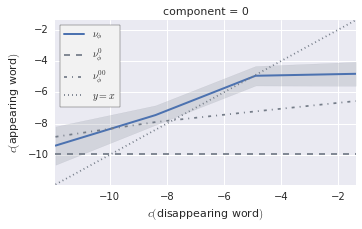

In [38]:
g = sb.FacetGrid(data=component_variations, col='component', col_wrap=3,
                 sharex=False, sharey=False, hue='component',
                 aspect=1.5, size=3)
g.map_dataframe(plot_variation, feature_field='component')
g.set_xlabels(r'$c($disappearing word$)$')
g.set_ylabels(r'$c($appearing word$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='best')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-pca_variations-absolute'),
                  bbox_inches='tight', dpi=300)

### 4.3 CAVEAT: reduction of the numbers of words and substitutions

As explained above, this PCA analysis can only use words for which *all* the features are defined (in this case, the features listed in `relevant_features`). So note the following:

In [39]:
for feature in relevant_features:
    print("Feature '{}' is based on {} words."
          .format(feature, len(Substitution
                               ._transformed_feature(feature)())))

# Compute the number of words that have all PAPER_FEATURES defined.
words = set()
for tfeature in [Substitution._transformed_feature(feature)
                 for feature in relevant_features]:
    words.update(tfeature())

data = dict((feature, []) for feature in relevant_features)
words_list = []
for word in words:
    words_list.append(word)
    for feature in relevant_features:
        data[feature].append(Substitution
                             ._transformed_feature(feature)(word))
wordsdf = pd.DataFrame(data)
wordsdf['words'] = words_list
del words_list, data

print()
print("Among all the set of words used by these features, "
      "only {} are used."
      .format(len(wordsdf.dropna())))

print()
print("Similarly, we mined {} (cluster-unique) substitutions, "
      "but the PCA is in fact"
      " computed on {} of them (those where all features are defined)."
      .format(len(set(variations['cluster_id'])), len(pcavariations)))

Feature 'frequency' is based on 33450 words.
Feature 'aoa' is based on 30102 words.
Feature 'letters_count' is based on 42786 words.



Among all the set of words used by these features, only 14450 are used.

Similarly, we mined 422 (cluster-unique) substitutions, but the PCA is in fact computed on 322 of them (those where all features are defined).


The way $\mathcal{H}_0$ and $\mathcal{H}_{00}$ are computed makes them also affected by this.

## 5 Interactions between features (by Anova)

Some useful variables first.

In [40]:
cuts = [('fixed bins', pd.cut)]#, ('quantiles', pd.qcut)]
rels = [('global', ''), ('sentence-relative', '_rel')]

def star_level(p):
    if p < .001:
        return '***'
    elif p < .01:
        return ' **'
    elif p < .05:
        return '  *'
    else:
        return 'ns.'

Now for each feature, assess if it has an interaction with the other features' **destination value**. We look at this for all pairs of features, with all pairs of global/sentence-relative value and types of binning (fixed width/quantiles). So it's a lot of answers.

Three stars means $p < .001$, two $p < .01$, one $p < .05$, and `ns.` means non-significative.

In [41]:
for feature1 in PAPER_FEATURES:
    print('-' * len(feature1))
    print(feature1)
    print('-' * len(feature1))

    for feature2 in PAPER_FEATURES:
        print()
        print('-> {}'.format(feature2))
        for (cut_label, cut), (rel1_label, rel1) in product(cuts, rels):
            for (rel2_label, rel2) in rels:
                source = variations.pivot(
                    index='cluster_id', columns='feature',
                    values='source' + rel1)[feature1]
                destination = variations.pivot(
                    index='cluster_id', columns='feature',
                    values='destination' + rel2)[feature2]

                # Compute binning.
                for bin_count in range(BIN_COUNT, 0, -1):
                    try:
                        source_bins = cut(source, bin_count, labels=False)
                        break
                    except ValueError:
                        pass

                _, p = stats.f_oneway(*[destination[source_bins == i]
                                        .dropna()
                                        for i in range(bin_count)])
                print('  {} {} -> {}'
                      .format(star_level(p), rel1_label, rel2_label))
    print()

---------
frequency
---------

-> frequency


  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> aoa
  *** global -> global
  *** global -> sentence-relative
  ns. sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> clustering
    * global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> letters_count
  *** global -> global


   ** global -> sentence-relative
    * sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> synonyms_count


  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> orthographic_density
   ** global -> global
  *** global -> sentence-relative
  ns. sentence-relative -> global
   ** sentence-relative -> sentence-relative

---
aoa
---

-> frequency
  *** global -> global
  ns. global -> sentence-relative
    * sentence-relative -> global
   ** sentence-relative -> sentence-relative

-> aoa
  *** global -> global


  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> clustering


  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> letters_count
  *** global -> global
  *** global -> sentence-relative
  ns. sentence-relative -> global
   ** sentence-relative -> sentence-relative

-> synonyms_count
  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> orthographic_density
   ** global -> global
    * global -> sentence-relative


  ns. sentence-relative -> global
   ** sentence-relative -> sentence-relative

----------
clustering
----------

-> frequency
  ns. global -> global


  ns. global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> aoa
  *** global -> global
    * global -> sentence-relative
    * sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> clustering
   ** global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global
   ** sentence-relative -> sentence-relative

-> letters_count
  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global


  ns. sentence-relative -> sentence-relative

-> synonyms_count
  ns. global -> global
  ns. global -> sentence-relative


  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> orthographic_density
  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-------------
letters_count
-------------

-> frequency
  ns. global -> global
  ns. global -> sentence-relative
    * sentence-relative -> global
   ** sentence-relative -> sentence-relative

-> aoa
    * global -> global
  ns. global -> sentence-relative
  *** sentence-relative -> global


  *** sentence-relative -> sentence-relative

-> clustering
  ns. global -> global
  ns. global -> sentence-relative


  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> letters_count
  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> synonyms_count
  *** global -> global
   ** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> orthographic_density
  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global


  *** sentence-relative -> sentence-relative

--------------
synonyms_count
--------------

-> frequency
  ns. global -> global
  ns. global -> sentence-relative


  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> aoa
    * global -> global
  *** global -> sentence-relative
    * sentence-relative -> global
   ** sentence-relative -> sentence-relative

-> clustering
  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> letters_count
  ns. global -> global
  ns. global -> sentence-relative
    * sentence-relative -> global


  ns. sentence-relative -> sentence-relative

-> synonyms_count
  *** global -> global
  *** global -> sentence-relative


  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> orthographic_density
  ns. global -> global
   ** global -> sentence-relative
  ns. sentence-relative -> global
   ** sentence-relative -> sentence-relative

--------------------
orthographic_density
--------------------

-> frequency
  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> aoa
  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> clustering


  ns. global -> global
  ns. global -> sentence-relative


  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> letters_count
   ** global -> global
  ns. global -> sentence-relative
    * sentence-relative -> global
   ** sentence-relative -> sentence-relative

-> synonyms_count
  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> orthographic_density
  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative



Now for each feature, look at its interaction with the other features' **variation (i.e. destination - source)**. Same drill, same combinations.

In [42]:
for feature1 in PAPER_FEATURES:
    print('-' * len(feature1))
    print(feature1)
    print('-' * len(feature1))

    for feature2 in PAPER_FEATURES:
        print()
        print('-> {}'.format(feature2))
        for (cut_label, cut), (rel1_label, rel1) in product(cuts, rels):
            for (rel2_label, rel2) in rels:
                source = variations.pivot(
                    index='cluster_id', columns='feature',
                    values='source' + rel1)[feature1]
                destination = variations.pivot(
                    index='cluster_id', columns='feature',
                    values='destination' + rel2)[feature2]\
                    - variations.pivot(
                    index='cluster_id', columns='feature',
                    values='source' + rel2)[feature2]

                # Compute binning.
                for bin_count in range(BIN_COUNT, 0, -1):
                    try:
                        source_bins = cut(source, bin_count, labels=False)
                        break
                    except ValueError:
                        pass

                _, p = stats.f_oneway(*[destination[source_bins == i]
                                        .dropna()
                                        for i in range(bin_count)])
                print('  {} {} -> {}'
                      .format(star_level(p), rel1_label, rel2_label))
    print()

---------
frequency
---------

-> frequency


  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> aoa
   ** global -> global
    * global -> sentence-relative
    * sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> clustering
    * global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> letters_count
  *** global -> global


   ** global -> sentence-relative


    * sentence-relative -> global
    * sentence-relative -> sentence-relative

-> synonyms_count
  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> orthographic_density
    * global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

---
aoa
---

-> frequency
  *** global -> global
  *** global -> sentence-relative
   ** sentence-relative -> global


   ** sentence-relative -> sentence-relative

-> aoa


  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> clustering
   ** global -> global
   ** global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> letters_count
  *** global -> global
  *** global -> sentence-relative
    * sentence-relative -> global
    * sentence-relative -> sentence-relative

-> synonyms_count
  ns. global -> global


  ns. global -> sentence-relative


    * sentence-relative -> global
    * sentence-relative -> sentence-relative

-> orthographic_density
  *** global -> global
  *** global -> sentence-relative
    * sentence-relative -> global
  ns. sentence-relative -> sentence-relative

----------
clustering
----------

-> frequency
   ** global -> global
  *** global -> sentence-relative
    * sentence-relative -> global
    * sentence-relative -> sentence-relative

-> aoa
    * global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global


  ns. sentence-relative -> sentence-relative

-> clustering


  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> letters_count
    * global -> global
    * global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> synonyms_count
  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> orthographic_density
    * global -> global


    * global -> sentence-relative


  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-------------
letters_count
-------------

-> frequency
   ** global -> global
    * global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> aoa
  *** global -> global
  *** global -> sentence-relative
   ** sentence-relative -> global
    * sentence-relative -> sentence-relative

-> clustering
  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global


  ns. sentence-relative -> sentence-relative

-> letters_count


  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> synonyms_count
  ns. global -> global
  ns. global -> sentence-relative
    * sentence-relative -> global
    * sentence-relative -> sentence-relative

-> orthographic_density
  ns. global -> global
  ns. global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

--------------
synonyms_count
--------------

-> frequency
  ns. global -> global


  ns. global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> aoa
  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> clustering
  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> letters_count
  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global


  ns. sentence-relative -> sentence-relative

-> synonyms_count
  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> orthographic_density
  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

--------------------
orthographic_density
--------------------

-> frequency
  *** global -> global
  *** global -> sentence-relative
   ** sentence-relative -> global
   ** sentence-relative -> sentence-relative

-> aoa
  *** global -> global


  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> clustering
  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> letters_count
  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> synonyms_count
  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global


  ns. sentence-relative -> sentence-relative

-> orthographic_density
  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative



Ok, so this can go on for a long time, and I'm not going to look at interactions with this lens (meaning at interaction of couples of features with another feature's destination values).

## 6 Regression

In [43]:
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures

In [44]:
rels = {False: ('global', ''),
        True: ('rel', '_rel')}

def regress(data, features, target,
            source_rel=False, dest_rel=False, interactions=False):
    if source_rel not in [True, False, 'both']:
        raise ValueError
    if not isinstance(dest_rel, bool):
        raise ValueError
    # Process source/destination relativeness arguments.
    if isinstance(source_rel, bool):
        source_rel = [source_rel]
    else:
        source_rel = [False, True]
    dest_rel_name, dest_rel = rels[dest_rel]
    
    features = tuple(sorted(features))
    feature_tuples = [('source' + rels[rel][1], feature)
                      for rel in source_rel
                      for feature in features]
    feature_names = [rels[rel][0] + '_' + feature
                     for rel in source_rel
                     for feature in features]
    
    # Get source and destination values.
    source = pd.pivot_table(
        data,
        values=['source' + rels[rel][1] for rel in source_rel],
        index=['cluster_id'],
        columns=['feature']
    )[feature_tuples].dropna()
    destination = variations[variations.feature == target]\
        .pivot(index='cluster_id', columns='feature',
               values='destination' + dest_rel)\
        .loc[source.index][target].dropna()
    source = source.loc[destination.index].values
    destination = destination.values

    # If asked to, get polynomial features.
    if interactions:
        poly = PolynomialFeatures(degree=2, interaction_only=True)
        source = poly.fit_transform(source)
        regress_features = [' * '.join([feature_names[j]
                                        for j, p in enumerate(powers)
                                        if p > 0]) or 'intercept'
                            for powers in poly.powers_]
    else:
        regress_features = feature_names

    # Regress.
    linreg = linear_model.LinearRegression(fit_intercept=not interactions)
    linreg.fit(source, destination)

    # And print the score and coefficients.
    print('Regressing {} with {} measures, {} interactions'
          .format(dest_rel_name + ' ' + target, len(source),
                  'with' if interactions else 'no'))
    print('           ' + '^' * len(dest_rel_name + ' ' + target))
    print('R^2 = {}'
          .format(linreg.score(source, destination)))
    print()
    coeffs = pd.Series(index=regress_features, data=linreg.coef_)
    if not interactions:
        coeffs = pd.Series(index=['intercept'], data=[linreg.intercept_])\
            .append(coeffs)
    with pd.option_context('display.max_rows', 999):
        print(coeffs)

In [45]:
for target in PAPER_FEATURES:
    print('-' * 70)
    for source_rel, dest_rel in product([False, True, 'both'],
                                        [False, True]):
        regress(variations, PAPER_FEATURES, target, source_rel=source_rel,
                dest_rel=dest_rel)
        print()
        regress(variations, PAPER_FEATURES, target, source_rel=source_rel,
                dest_rel=dest_rel, interactions=True)
        print()

----------------------------------------------------------------------
Regressing global frequency with 233 measures, no interactions
           ^^^^^^^^^^^^^^^^
R^2 = 0.038213789495747275

intercept                      9.577115
global_aoa                    -0.077307
global_clustering              0.187871
global_frequency               0.185746
global_letters_count          -0.044959
global_orthographic_density   -0.360617
global_synonyms_count         -0.117370
dtype: float64



Regressing global frequency with 233 measures, with interactions
           ^^^^^^^^^^^^^^^^
R^2 = 0.13991021775189127

intercept                                              11.716615
global_aoa                                             -1.811731
global_clustering                                      -0.150890
global_frequency                                        0.385409
global_letters_count                                   -0.150196
global_orthographic_density                             2.953439
global_synonyms_count                                   3.326686
global_aoa * global_clustering                         -0.067353
global_aoa * global_frequency                           0.070076
global_aoa * global_letters_count                       0.087586
global_aoa * global_orthographic_density                0.105876
global_aoa * global_synonyms_count                      0.056556
global_clustering * global_frequency                    0.017878
global_clustering * global_letters_

Regressing rel frequency with 233 measures, no interactions
           ^^^^^^^^^^^^^
R^2 = 0.36075878216056356

intercept                      9.209714
global_aoa                    -0.114263
global_clustering              0.241489
global_frequency              -0.790811
global_letters_count           0.042553
global_orthographic_density   -0.156046
global_synonyms_count          0.070962
rel_aoa                        0.037936
rel_clustering                 0.023063
rel_frequency                  1.037978
rel_letters_count             -0.107182
rel_orthographic_density      -0.189431
rel_synonyms_count            -0.218510
dtype: float64

Regressing rel frequency with 233 measures, with interactions
           ^^^^^^^^^^^^^
R^2 = 0.5548099904628678

intercept                                                -95.138258
global_aoa                                                 1.472853
global_clustering                                        -21.905605
global_frequency                   

Regressing global aoa with 215 measures, with interactions
           ^^^^^^^^^^
R^2 = 0.5090129924821236

intercept                                                 170.522259
global_aoa                                                 -2.697972
global_clustering                                          34.722854
global_frequency                                           -3.598628
global_letters_count                                       -1.027431
global_orthographic_density                               -23.339120
global_synonyms_count                                     -33.935382
rel_aoa                                                     4.516616
rel_clustering                                            -11.753131
rel_frequency                                              11.026145
rel_letters_count                                           4.975181
rel_orthographic_density                                   18.811288
rel_synonyms_count                                         12.804

Regressing rel clustering with 184 measures, with interactions
           ^^^^^^^^^^^^^^
R^2 = 0.25191402754693404

intercept                                        0.421046
rel_aoa                                          0.045230
rel_clustering                                   0.217918
rel_frequency                                    0.008814
rel_letters_count                               -0.035689
rel_orthographic_density                         0.118612
rel_synonyms_count                              -0.107233
rel_aoa * rel_clustering                        -0.016256
rel_aoa * rel_frequency                         -0.022943
rel_aoa * rel_letters_count                     -0.024521
rel_aoa * rel_orthographic_density               0.033274
rel_aoa * rel_synonyms_count                     0.064652
rel_clustering * rel_frequency                  -0.065097
rel_clustering * rel_letters_count              -0.057944
rel_clustering * rel_orthographic_density       -0.089425
rel_clustering

Regressing global letters_count with 233 measures, with interactions
           ^^^^^^^^^^^^^^^^^^^^
R^2 = 0.07389284245794736

intercept                                        5.992309
rel_aoa                                         -0.081326
rel_clustering                                   0.353747
rel_frequency                                    0.177159
rel_letters_count                                0.191825
rel_orthographic_density                         0.105434
rel_synonyms_count                               0.162640
rel_aoa * rel_clustering                        -0.036092
rel_aoa * rel_frequency                         -0.040693
rel_aoa * rel_letters_count                     -0.024326
rel_aoa * rel_orthographic_density              -0.047790
rel_aoa * rel_synonyms_count                     0.025236
rel_clustering * rel_frequency                   0.113235
rel_clustering * rel_letters_count              -0.006422
rel_clustering * rel_orthographic_density       -0.089116
re

Regressing rel synonyms_count with 227 measures, with interactions
           ^^^^^^^^^^^^^^^^^^
R^2 = 0.11771330025921567

intercept                                             -2.635651
global_aoa                                             0.358145
global_clustering                                      0.214419
global_frequency                                      -0.036961
global_letters_count                                   0.416565
global_orthographic_density                            1.179671
global_synonyms_count                                 -0.183115
global_aoa * global_clustering                         0.000824
global_aoa * global_frequency                         -0.021066
global_aoa * global_letters_count                     -0.018926
global_aoa * global_orthographic_density              -0.029815
global_aoa * global_synonyms_count                     0.019876
global_clustering * global_frequency                  -0.058396
global_clustering * global_letters_count    

intercept                                             -2.661345
global_aoa                                            -0.193773
global_clustering                                     -0.403481
global_frequency                                       0.320138
global_letters_count                                   0.093064
global_orthographic_density                            2.898605
global_synonyms_count                                  0.062320
global_aoa * global_clustering                        -0.032281
global_aoa * global_frequency                         -0.017466
global_aoa * global_letters_count                      0.022453
global_aoa * global_orthographic_density               0.036311
global_aoa * global_synonyms_count                    -0.020276
global_clustering * global_frequency                   0.012999
global_clustering * global_letters_count               0.052707
global_clustering * global_orthographic_density        0.261131
global_clustering * global_synonyms_coun